In [1]:
import pandas as pd

df = pd.read_excel("C:\\Users\\dharris\\Downloads\\IS Compliance Work Tracker-2025.xlsx", 
                   header=3, nrows=168)  # 171-3=168 to account for header row

In [2]:
df.head
df

Unnamed: 0                     Project  Clarity Code/ID  \
0           NaN  SailPoint phase 2 PRJ01083              NaN   
1           NaN                         NaN              NaN   
2           NaN                         NaN              NaN   
3           NaN                         NaN              NaN   
4           NaN                SAP PRJ00458              NaN   
..          ...                         ...              ...   
159         NaN                Docusign BAU              NaN   
160         NaN                         NaN              NaN   
161         NaN                         NaN              NaN   
162         NaN                   TULIP MES              NaN   
163         NaN                         NaN              NaN   

     Business Unit/Area                     ISBP  Work Category   Assigned To  \
0                   NaN                    Other            NaN  Adrian Horne   
1                   NaN                      NaN            NaN           NaN   
2                   NaN                      NaN            NaN           NaN   
3                   NaN                      NaN            NaN           NaN   
4                   NaN  IS Tech Ops and Quality            NaN           ERA   
..                  ...                      ...            ...           ...   
159                 NaN  IS Tech Ops and Quality            NaN  Adrian Horne   
160                 NaN                      NaN            NaN           NaN   
161                 NaN                      NaN            NaN           NaN   
162                 NaN  IS Tech Ops and Quality            NaN  Adrian Horne   
163                 NaN                      NaN            NaN           NaN   

    Report Card? Estimated\nStart Estimated \nFinish (Due Date)  ...  \
0             NO       2024-01-15                    2024-05-06  ...   
1            NaN              NaT                           NaT  ...   
2            NaN              NaT                           NaT  ...   
3            NaN              NaT                           NaT  ...   
4            YES       2024-01-01                    2024-12-31  ...   
..           ...              ...                           ...  ...   
159          YES       2025-01-01                    2025-12-31  ...   
160          NaN              NaT                           NaT  ...   
161          NaN              NaT                           NaT  ...   
162          YES       2025-01-01                    2025-05-01  ...   
163          NaN              NaT                           NaT  ...   

     AI or Manual Generation AI Time Saved (hours)       Status  Start Date  \
0                        NaN                   NaN          NaN         NaT   
1                        NaN                   NaN          NaN         NaT   
2                        NaN                   NaN          NaN         NaT   
3                        NaN                   NaN          NaN         NaT   
4                        NaN                   NaN          NaN         NaT   
..                       ...                   ...          ...         ...   
159                  Manual                    0.0     Complete  2025-02-03   
160                      NaN                   NaN          NaN         NaT   
161                      NaN                   NaN          NaN         NaT   
162                  CoPilot                   4.0     Complete  2025-01-09   
163                      NaN                   NaN  Not Started         NaT   

     Completion Date  Lead Time On Time?  Defects Notes Unnamed: 28  
0                NaT        NaN      NaN      NaN   NaN         NaN  
1                NaT        NaN      NaN      NaN   NaN         NaN  
2                NaT        NaN      NaN      NaN   NaN         NaN  
3                NaT        NaN      NaN      NaN   NaN         NaN  
4                NaT        NaN      NaN      NaN   NaN         NaN  
..               ...        .

In [3]:
df = df.dropna(how='all')
df = df.reset_index(drop=True)

In [4]:
# Drop columns that have all null values
df_cleaned = df.dropna(axis=1, how='all')

# Print the shape before and after to show the difference
print(f"Original dataframe shape: {df.shape}")
print(f"Cleaned dataframe shape: {df_cleaned.shape}")

# Reassign back to df
df = df_cleaned

Original dataframe shape: (87, 29)
Cleaned dataframe shape: (87, 25)


In [5]:
# Forward fill project names
df['Project'] = df['Project'].fillna(method='ffill')

C:\Users\dharris\AppData\Local\Temp\ipykernel_8620\82445356.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Project'] = df['Project'].fillna(method='ffill')


In [6]:
# Fill ISBP and Assigned To using forward fill method
df['ISBP'] = df['ISBP'].fillna(method='ffill')
df['Assigned To'] = df['Assigned To'].fillna(method='ffill')

C:\Users\dharris\AppData\Local\Temp\ipykernel_8620\675224658.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ISBP'] = df['ISBP'].fillna(method='ffill')
C:\Users\dharris\AppData\Local\Temp\ipykernel_8620\675224658.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Assigned To'] = df['Assigned To'].fillna(method='ffill')


In [7]:
# Get summary statistics for Actual Duration in Days
print(df['Actual Duration in Days'].describe())

count    1.0
mean     6.0
std      NaN
min      6.0
25%      6.0
50%      6.0
75%      6.0
max      6.0
Name: Actual Duration in Days, dtype: float64


In [8]:
print("Summary statistics for Lead Time:")
print(df['Lead Time'].describe())

Summary statistics for Lead Time:
count    41.000000
mean      5.902439
std       7.080978
min       0.000000
25%       1.000000
50%       3.000000
75%       7.000000
max      29.000000
Name: Lead Time, dtype: float64


In [9]:
print("Summary statistics for Estimated Duration in Days:")
print(df['Estimated Duration (in days)'].describe())

Summary statistics for Estimated Duration in Days:
count     22.000000
mean     228.227273
std      115.333443
min       27.000000
25%      119.250000
50%      240.000000
75%      360.000000
max      360.000000
Name: Estimated Duration (in days), dtype: float64


In [10]:
# Group by Deliverable and calculate count and mean of Lead Time
deliverable_stats = df.groupby('Deliverable')['Lead Time'].agg(['count', 'mean']).reset_index()
deliverable_stats = deliverable_stats[deliverable_stats['Deliverable'].notna()]
deliverable_stats = deliverable_stats.sort_values('count', ascending=False)
print("Deliverable Lead Time Statistics:")
print(deliverable_stats)

Deliverable Lead Time Statistics:
                       Deliverable  count      mean
9                     Test Scripts     11  7.636364
0                   Change Control      9  4.555556
10                URS & Feature RA      7  8.428571
4   Release Impact Risk Assessment      6  0.666667
12       Validation Summary Report      3  7.666667
2                            Other      2  9.000000
8                      Test Report      1  0.000000
6           System Risk Assessment      1  6.000000
5      Sprint Qualification Report      1  7.000000
3          Process Risk Assessment      0       NaN
1                   Migration Plan      0       NaN
7                        Test Plan      0       NaN
11                        Val Plan      0       NaN


In [11]:
status_counts = df['Status'].value_counts()
print("Status Counts:")
print(status_counts)

Status Counts:
Status
Complete       41
WIP            23
Not Started     3
Name: count, dtype: int64


In [12]:
# Count defects
defect_counts = df['Defects'].value_counts()
print("\nDefect Counts:")
print(defect_counts)

# Calculate percentage of defects
total_defects = df['Defects'].notna().sum()
defect_percentage = (defect_counts['YES'] / total_defects * 100) if 'YES' in defect_counts else 0
print(f"\nPercentage of Defects: {defect_percentage:.1f}%")

# Sum AI time saved
ai_time_saved = df['AI Time Saved (hours)'].sum()
print(f"\nTotal AI Time Saved: {ai_time_saved:.1f} hours")


Defect Counts:
Defects
NO     35
YES     1
Name: count, dtype: int64

Percentage of Defects: 2.8%

Total AI Time Saved: 9.0 hours


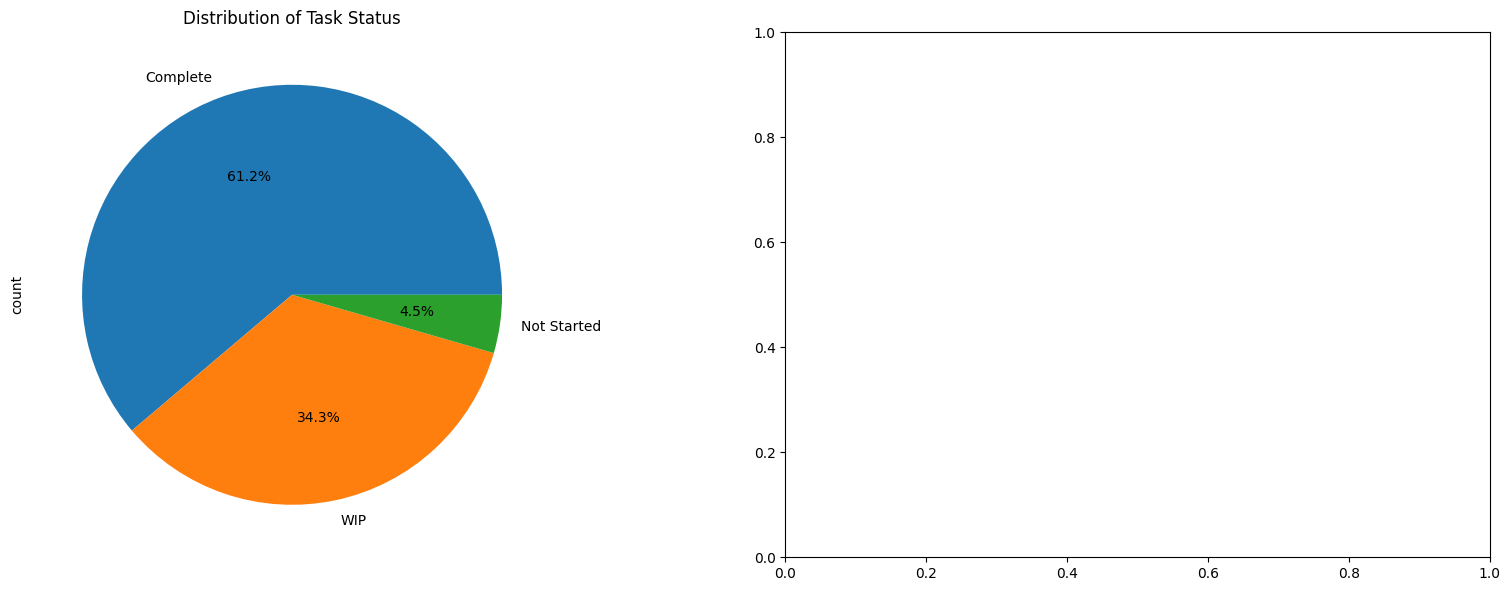

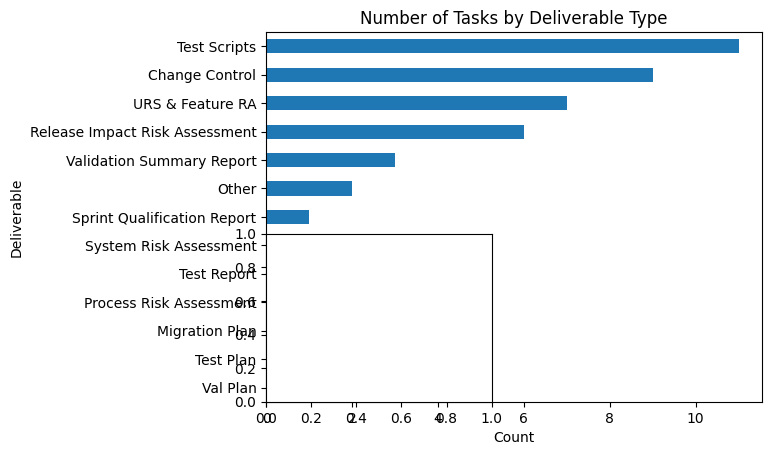

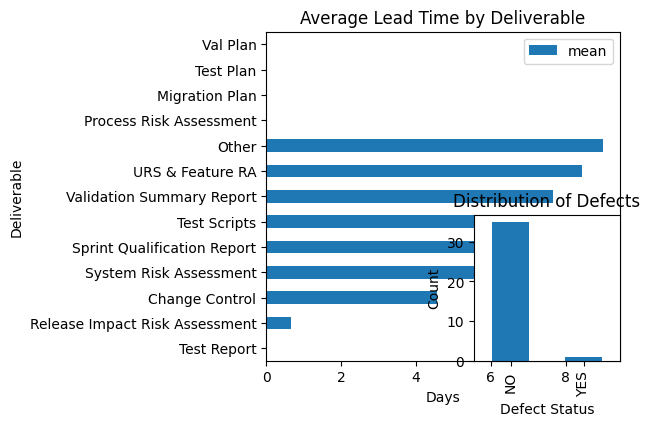

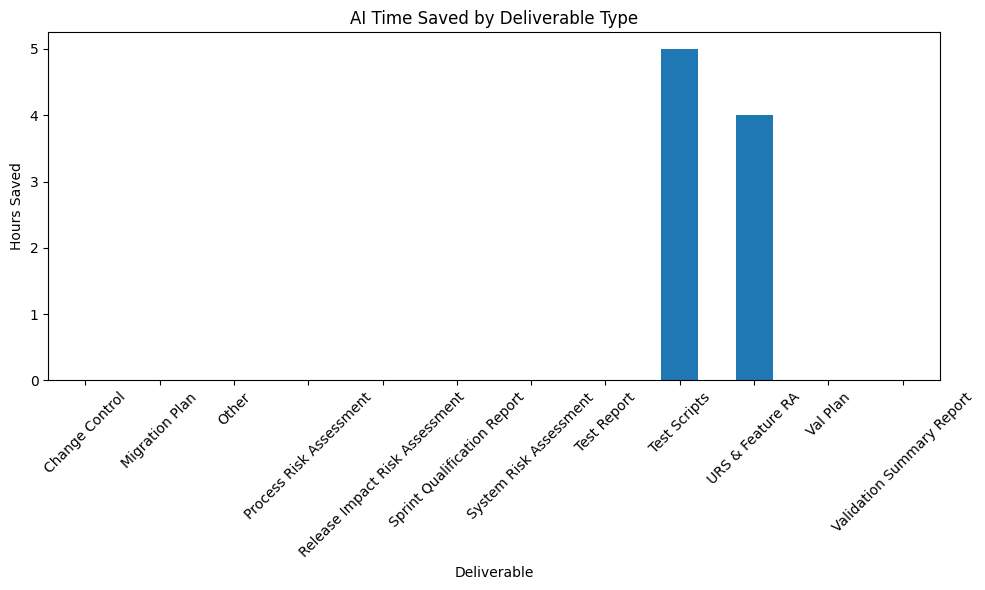

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a figure with subplots
plt.figure(figsize=(20,15))

# 1. Status Distribution Pie Chart
plt.subplot(2,2,1)
status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Task Status')

# 2. Deliverable Count Bar Chart
plt.subplot(2,2,2)
deliverable_stats.sort_values('count', ascending=True).plot(kind='barh', x='Deliverable', y='count')
plt.title('Number of Tasks by Deliverable Type')
plt.xlabel('Count')

# 3. Average Lead Time by Deliverable
plt.subplot(2,2,3)
deliverable_stats.sort_values('mean', ascending=True).plot(kind='barh', x='Deliverable', y='mean')
plt.title('Average Lead Time by Deliverable')
plt.xlabel('Days')

# 4. Defects Distribution
plt.subplot(2,2,4)
defect_counts.plot(kind='bar')
plt.title('Distribution of Defects')
plt.xlabel('Defect Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Additional visualization for AI Time Saved
plt.figure(figsize=(10,6))
ai_time_saved_by_deliverable = df[df['AI Time Saved (hours)'].notna()].groupby('Deliverable')['AI Time Saved (hours)'].sum()
ai_time_saved_by_deliverable.plot(kind='bar')
plt.title('AI Time Saved by Deliverable Type')
plt.xlabel('Deliverable')
plt.ylabel('Hours Saved')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

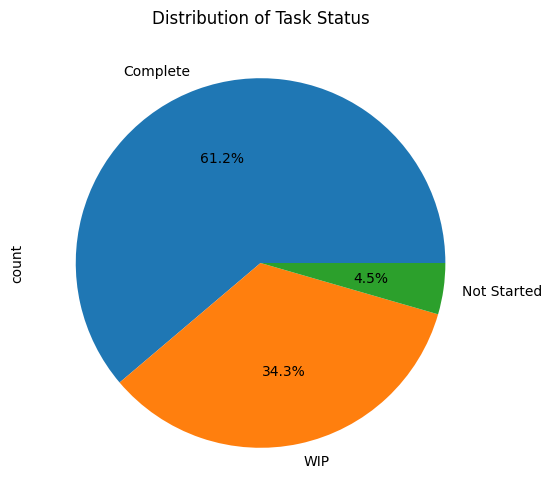

<Figure size 1200x800 with 0 Axes>

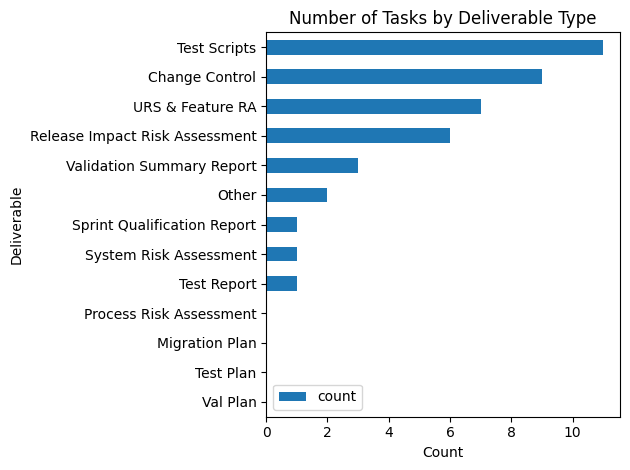

<Figure size 1200x800 with 0 Axes>

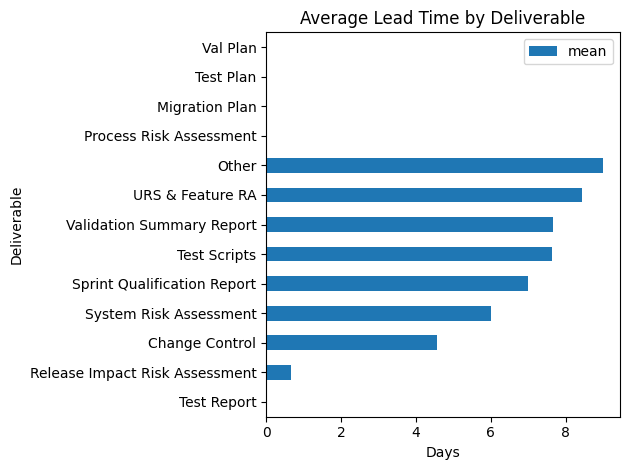

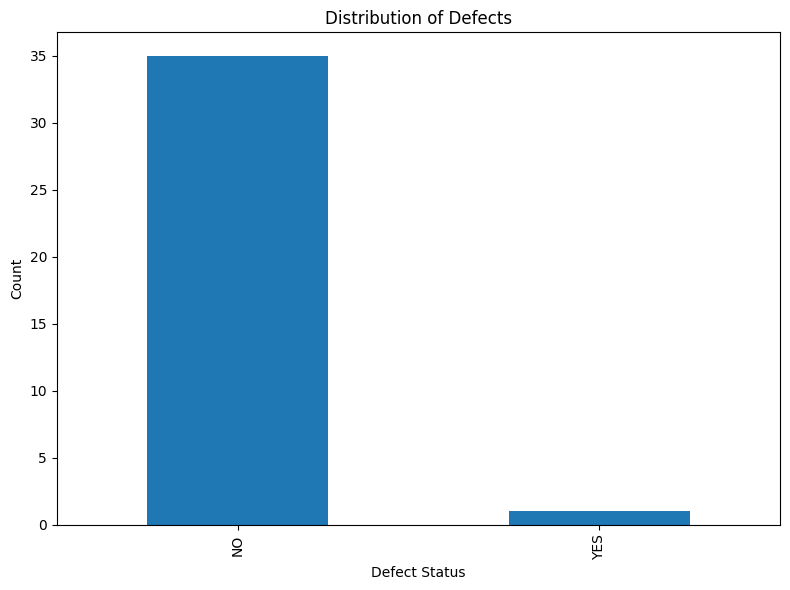

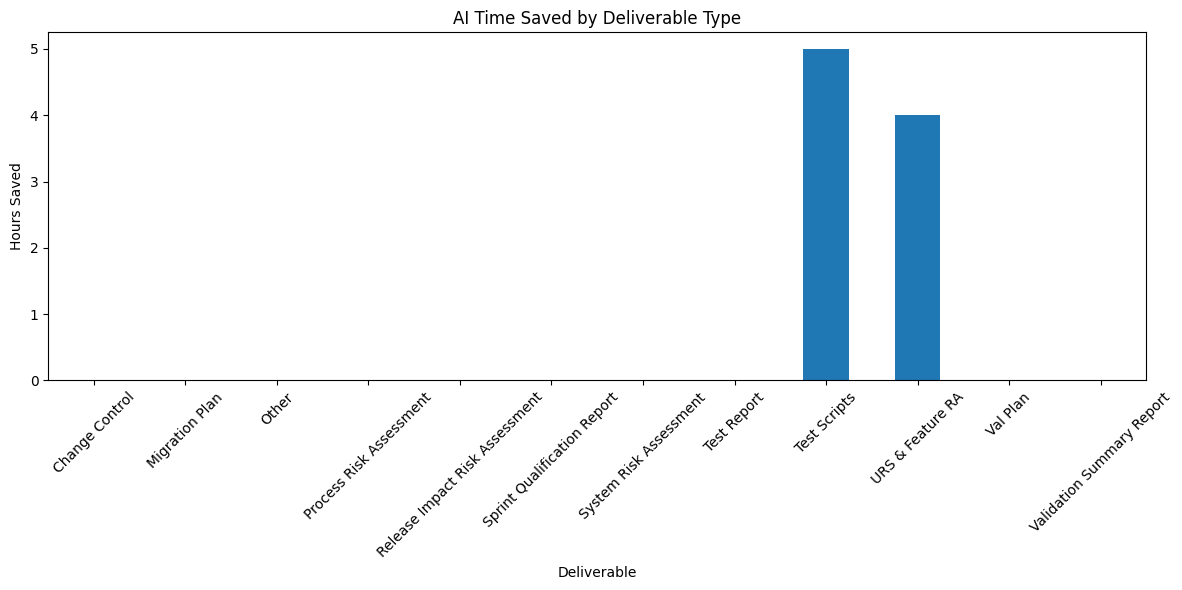

In [14]:
# Create separate visualizations for better readability

# 1. Status Distribution Pie Chart
plt.figure(figsize=(10,6))
status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Task Status')
plt.show()

# 2. Deliverable Count Bar Chart
plt.figure(figsize=(12,8))
deliverable_stats.sort_values('count', ascending=True).plot(kind='barh', x='Deliverable', y='count')
plt.title('Number of Tasks by Deliverable Type')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# 3. Average Lead Time by Deliverable
plt.figure(figsize=(12,8))
deliverable_stats.sort_values('mean', ascending=True).plot(kind='barh', x='Deliverable', y='mean')
plt.title('Average Lead Time by Deliverable')
plt.xlabel('Days')
plt.tight_layout()
plt.show()

# 4. Defects Distribution
plt.figure(figsize=(8,6))
defect_counts.plot(kind='bar')
plt.title('Distribution of Defects')
plt.xlabel('Defect Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5. AI Time Saved by Deliverable
plt.figure(figsize=(12,6))
ai_time_saved_by_deliverable.plot(kind='bar')
plt.title('AI Time Saved by Deliverable Type')
plt.xlabel('Deliverable')
plt.ylabel('Hours Saved')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Create analysis by ISBP and Assigned To

# Count of tasks by ISBP and Status
isbp_status = pd.crosstab(df['ISBP'], df['Status'])
print("\nTask Status by ISBP:")
print(isbp_status)

# Count of tasks by Assigned To and Status 
assigned_status = pd.crosstab(df['Assigned To'], df['Status'])
print("\nTask Status by Assigned To:")
print(assigned_status)

# Calculate average lead times
isbp_lead = df.groupby('ISBP')['Lead Time'].agg(['mean', 'count']).round(1)
print("\nAverage Lead Time by ISBP:")
print(isbp_lead)

assigned_lead = df.groupby('Assigned To')['Lead Time'].agg(['mean', 'count']).round(1)
print("\nAverage Lead Time by Assigned To:")
print(assigned_lead)

# Calculate defect rates
isbp_defects = pd.crosstab(df['ISBP'], df['Defects'])
isbp_defect_rate = pd.Series(0.0, index=isbp_defects.index)  # Initialize with zeros
if 'YES' in isbp_defects.columns:
	isbp_defect_rate = (isbp_defects['YES'] / isbp_defects.sum(axis=1) * 100).round(1)
print("\nDefect Rate % by ISBP:")
assigned_defects = pd.crosstab(df['Assigned To'], df['Defects'])
assigned_defect_rate = pd.Series(0.0, index=assigned_defects.index)  # Initialize with zeros
if 'YES' in assigned_defects.columns:
	assigned_defect_rate = (assigned_defects['YES'] / assigned_defects.sum(axis=1) * 100).round(1)

print("\nDefect Rate % by Assigned To:")
print(assigned_defect_rate)


Task Status by ISBP:
Status                   Complete  Not Started  WIP
ISBP                                               
IS R&D                         33            0   15
IS Tech Ops and Quality         8            3    7
Other                           0            0    1

Task Status by Assigned To:
Status           Complete  Not Started  WIP
Assigned To                                
Adrian Horne            4            1    3
ERA                    21            2    9
Ketaki Rahalkar        15            0    7
Rephine                 1            0    4

Average Lead Time by ISBP:
                         mean  count
ISBP                                
IS R&D                    4.6     33
IS Tech Ops and Quality  11.2      8
Other                     NaN      0

Average Lead Time by Assigned To:
                 mean  count
Assigned To                 
Adrian Horne      9.0      4
ERA               7.1     21
Ketaki Rahalkar   2.9     15
Rephine          13.0      1

De

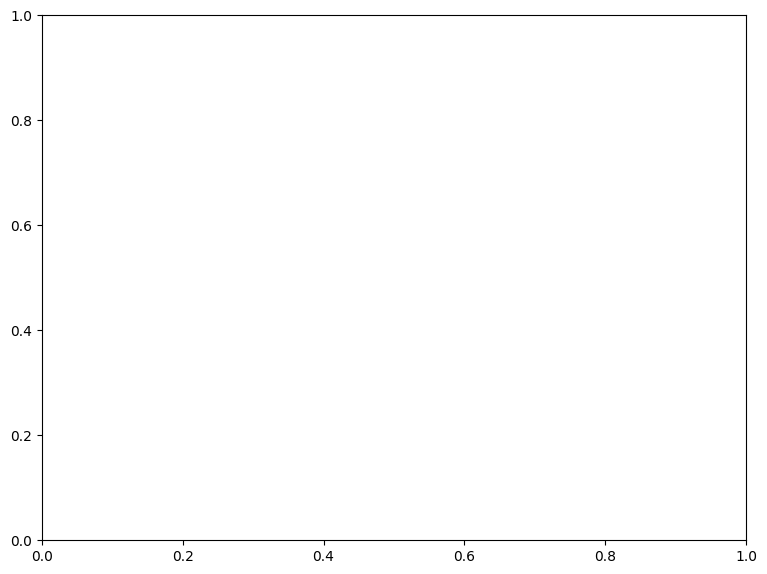

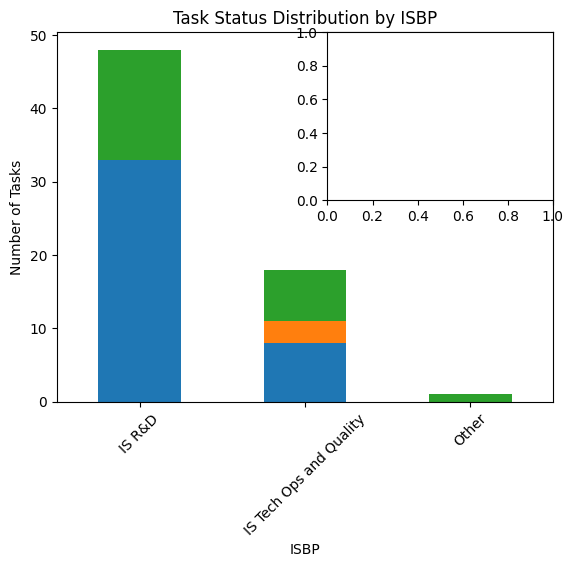

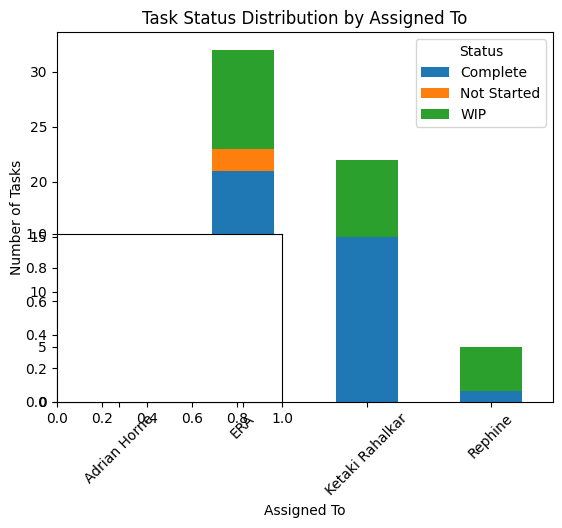

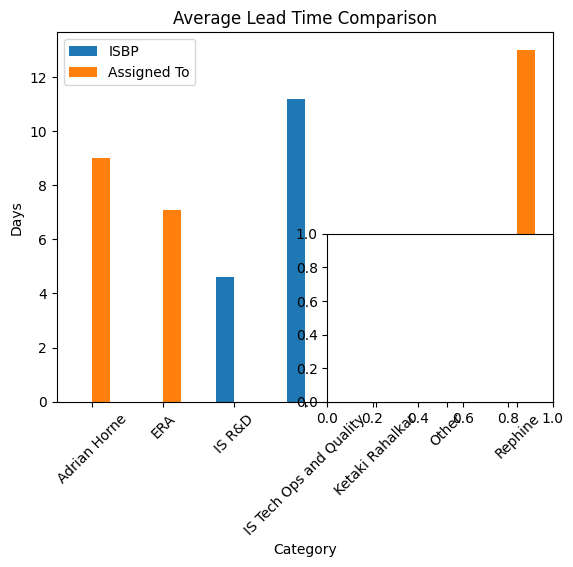

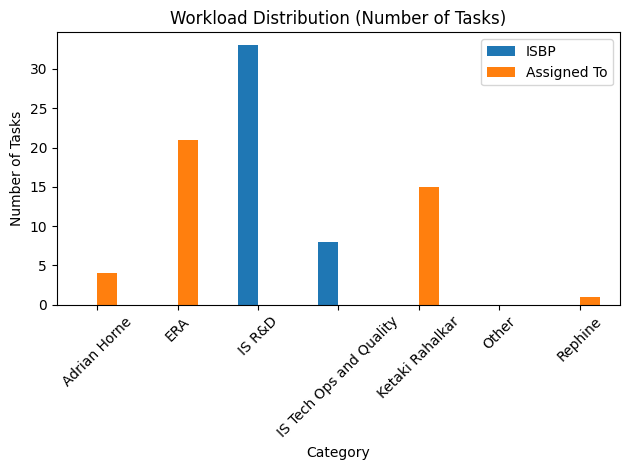

In [16]:
# Create visualizations for ISBP and Assigned To analysis
fig = plt.figure(figsize=(20, 15))

# 1. Task Status by ISBP
plt.subplot(2, 2, 1)
isbp_status.plot(kind='bar', stacked=True)
plt.title('Task Status Distribution by ISBP')
plt.xlabel('ISBP')
plt.ylabel('Number of Tasks')
plt.legend(title='Status')
plt.xticks(rotation=45)

# 2. Task Status by Assigned To
plt.subplot(2, 2, 2)
assigned_status.plot(kind='bar', stacked=True)
plt.title('Task Status Distribution by Assigned To')
plt.xlabel('Assigned To')
plt.ylabel('Number of Tasks')
plt.legend(title='Status')
plt.xticks(rotation=45)

# 3. Average Lead Time Comparison
plt.subplot(2, 2, 3)
lead_time_comparison = pd.DataFrame({
    'ISBP': isbp_lead['mean'],
    'Assigned To': assigned_lead['mean']
})
lead_time_comparison.plot(kind='bar')
plt.title('Average Lead Time Comparison')
plt.xlabel('Category')
plt.ylabel('Days')
plt.legend()
plt.xticks(rotation=45)

# 4. Workload Distribution (Task Count)
plt.subplot(2, 2, 4)
workload_comparison = pd.DataFrame({
    'ISBP': isbp_lead['count'],
    'Assigned To': assigned_lead['count']
})
workload_comparison.plot(kind='bar')
plt.title('Workload Distribution (Number of Tasks)')
plt.xlabel('Category')
plt.ylabel('Number of Tasks')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

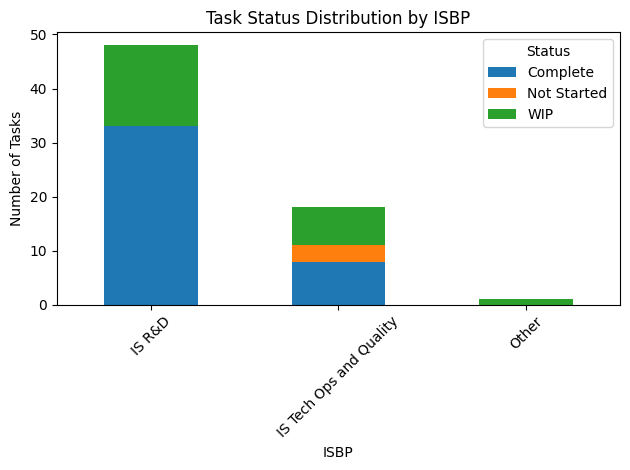

<Figure size 1200x600 with 0 Axes>

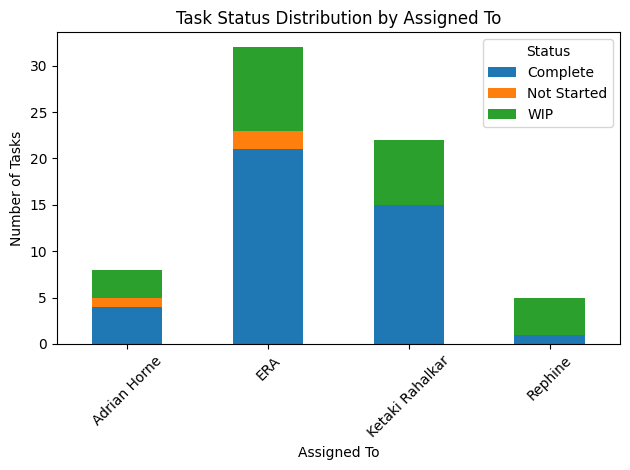

<Figure size 1200x600 with 0 Axes>

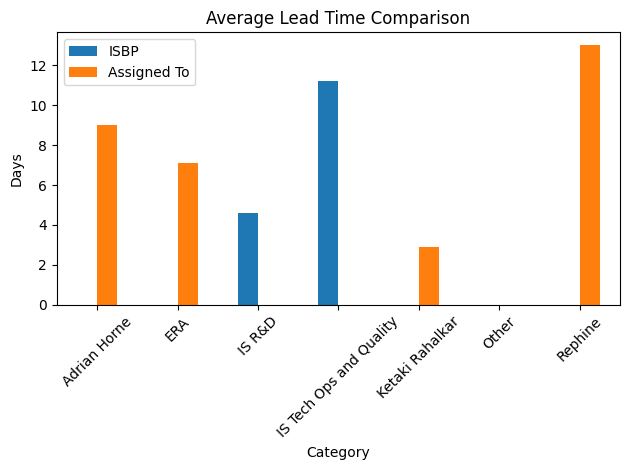

<Figure size 1200x600 with 0 Axes>

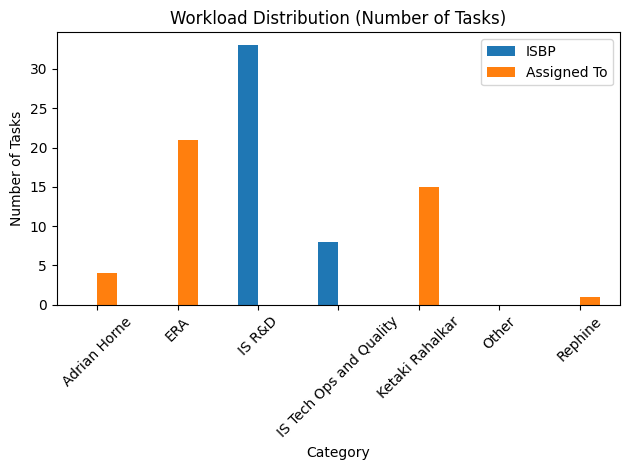

In [17]:
# Create individual charts for workload analysis

# 1. Tasks by ISBP
plt.figure(figsize=(12,6))
isbp_status.plot(kind='bar', stacked=True)
plt.title('Task Status Distribution by ISBP')
plt.xlabel('ISBP')
plt.ylabel('Number of Tasks')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Tasks by Assigned To 
plt.figure(figsize=(12,6))
assigned_status.plot(kind='bar', stacked=True)
plt.title('Task Status Distribution by Assigned To')
plt.xlabel('Assigned To')
plt.ylabel('Number of Tasks') 
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Average Lead Times
plt.figure(figsize=(12,6))
lead_time_comparison.plot(kind='bar')
plt.title('Average Lead Time Comparison')
plt.xlabel('Category')
plt.ylabel('Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Task Count Distribution
plt.figure(figsize=(12,6))
workload_comparison.plot(kind='bar')
plt.title('Workload Distribution (Number of Tasks)')
plt.xlabel('Category')
plt.ylabel('Number of Tasks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

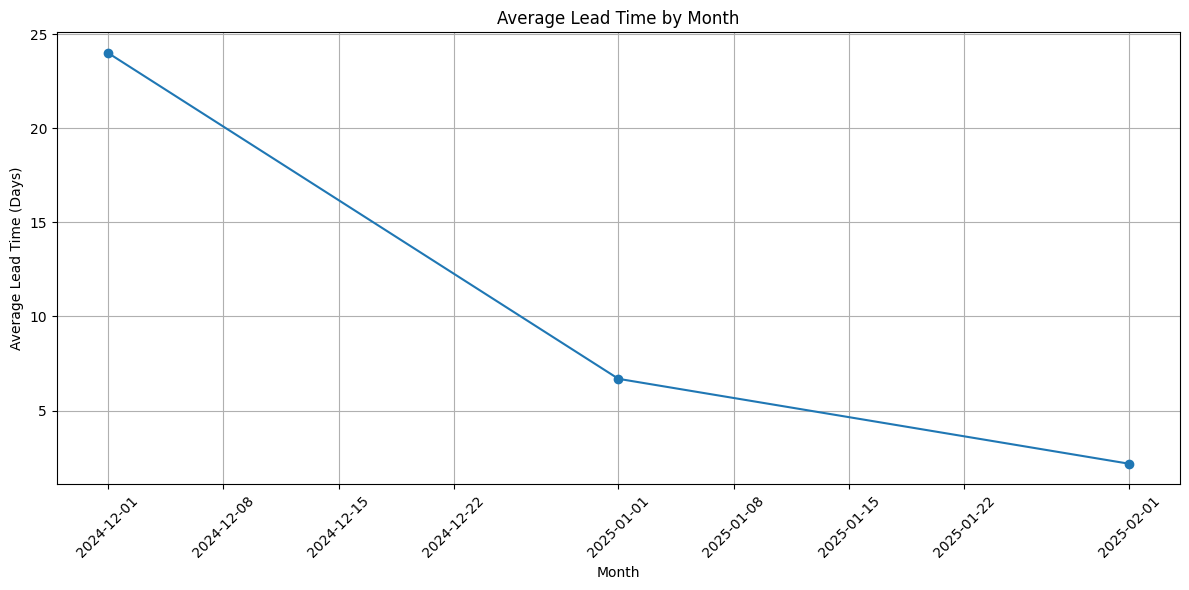

In [18]:
# Convert Start Date to datetime if it's not already
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Create monthly lead time data
monthly_leadtime = df.groupby(df['Start Date'].dt.to_period('M'))['Lead Time'].mean()

# Convert period index to datetime for plotting
monthly_leadtime.index = monthly_leadtime.index.astype(str).map(lambda x: pd.to_datetime(x + '-01'))

# Create the run chart
plt.figure(figsize=(12,6))
plt.plot(monthly_leadtime.index, monthly_leadtime.values, marker='o')

plt.title('Average Lead Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Lead Time (Days)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

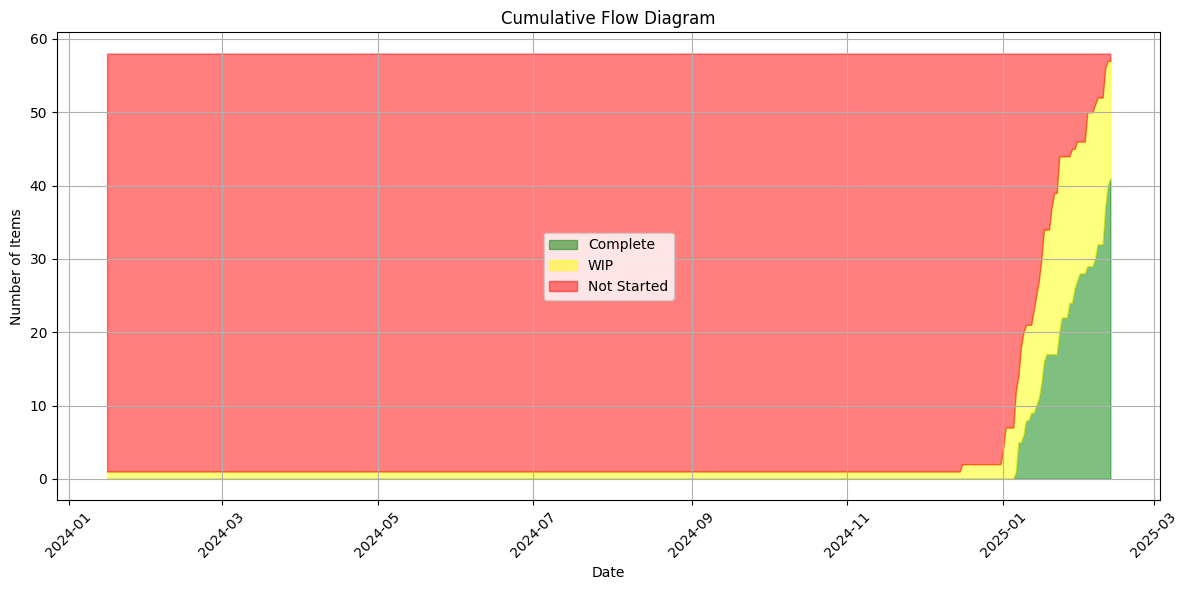

In [19]:
# Create a cumulative flow diagram
# First, get the data by date and status
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['Completion Date'] = pd.to_datetime(df['Completion Date'])

# Create date range from earliest start to latest completion
date_range = pd.date_range(start=df['Start Date'].min(), 
                          end=df['Completion Date'].max())

# Initialize dataframe for cumulative counts
cumulative_data = pd.DataFrame(index=date_range)

# Calculate cumulative counts for each status
for date in date_range:
    # Count items that have started but not completed (WIP)
    wip_mask = (df['Start Date'] <= date) & ((df['Completion Date'].isna()) | (df['Completion Date'] > date))
    cumulative_data.loc[date, 'WIP'] = wip_mask.sum()
    
    # Count completed items
    complete_mask = (df['Start Date'] <= date) & (df['Completion Date'] <= date)
    cumulative_data.loc[date, 'Complete'] = complete_mask.sum()
    
    # Count not started items
    not_started_mask = df['Start Date'] > date
    cumulative_data.loc[date, 'Not Started'] = not_started_mask.sum()

# Plot
plt.figure(figsize=(12,6))
plt.fill_between(cumulative_data.index, cumulative_data['Complete'], 
                 color='green', alpha=0.5, label='Complete')
plt.fill_between(cumulative_data.index, cumulative_data['Complete'] + cumulative_data['WIP'], 
                 cumulative_data['Complete'], color='yellow', alpha=0.5, label='WIP')
plt.fill_between(cumulative_data.index, cumulative_data['Complete'] + cumulative_data['WIP'] + cumulative_data['Not Started'], 
                 cumulative_data['Complete'] + cumulative_data['WIP'], color='red', alpha=0.5, label='Not Started')

plt.title('Cumulative Flow Diagram')
plt.xlabel('Date')
plt.ylabel('Number of Items')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

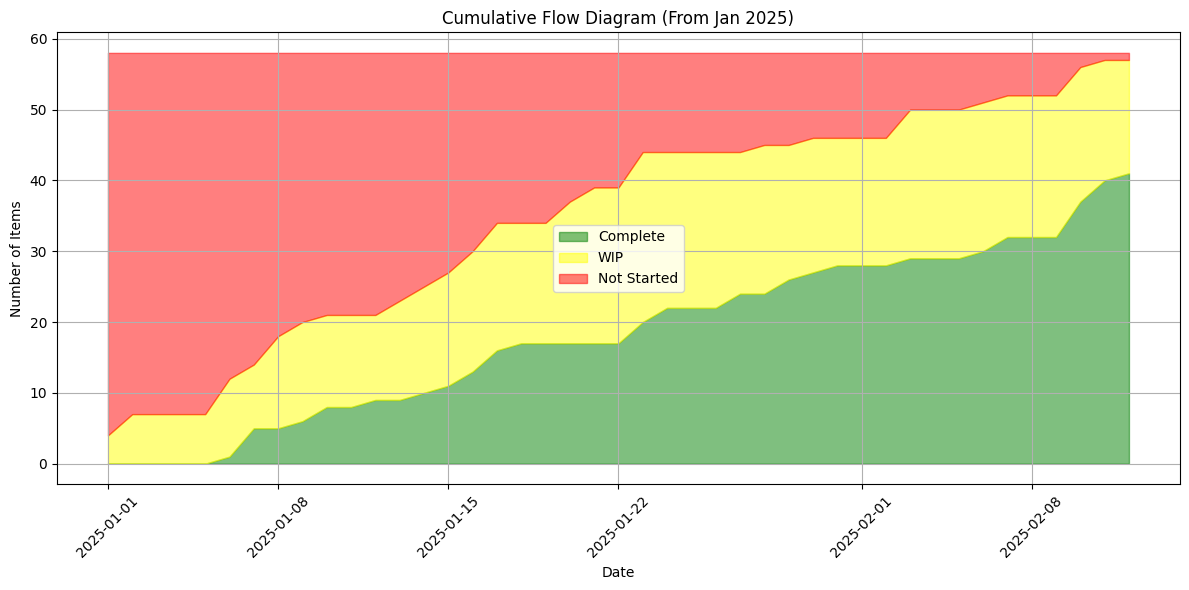

In [20]:
# Create a cumulative flow diagram starting from 1st Jan 2025
start_date = pd.Timestamp('2025-01-01')
end_date = df['Completion Date'].max()

# Create date range from Jan 1st 2025 to latest completion
date_range = pd.date_range(start=start_date, end=end_date)

# Initialize dataframe for cumulative counts
cumulative_data = pd.DataFrame(index=date_range)

# Calculate cumulative counts for each status
for date in date_range:
    # Count items that have started but not completed (WIP)
    wip_mask = (df['Start Date'] <= date) & ((df['Completion Date'].isna()) | (df['Completion Date'] > date))
    cumulative_data.loc[date, 'WIP'] = wip_mask.sum()
    
    # Count completed items
    complete_mask = (df['Start Date'] <= date) & (df['Completion Date'] <= date)
    cumulative_data.loc[date, 'Complete'] = complete_mask.sum()
    
    # Count not started items
    not_started_mask = df['Start Date'] > date
    cumulative_data.loc[date, 'Not Started'] = not_started_mask.sum()

# Plot
plt.figure(figsize=(12,6))
plt.fill_between(cumulative_data.index, cumulative_data['Complete'], 
                 color='green', alpha=0.5, label='Complete')
plt.fill_between(cumulative_data.index, cumulative_data['Complete'] + cumulative_data['WIP'], 
                 cumulative_data['Complete'], color='yellow', alpha=0.5, label='WIP')
plt.fill_between(cumulative_data.index, cumulative_data['Complete'] + cumulative_data['WIP'] + cumulative_data['Not Started'], 
                 cumulative_data['Complete'] + cumulative_data['WIP'], color='red', alpha=0.5, label='Not Started')

plt.title('Cumulative Flow Diagram (From Jan 2025)')
plt.xlabel('Date')
plt.ylabel('Number of Items')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

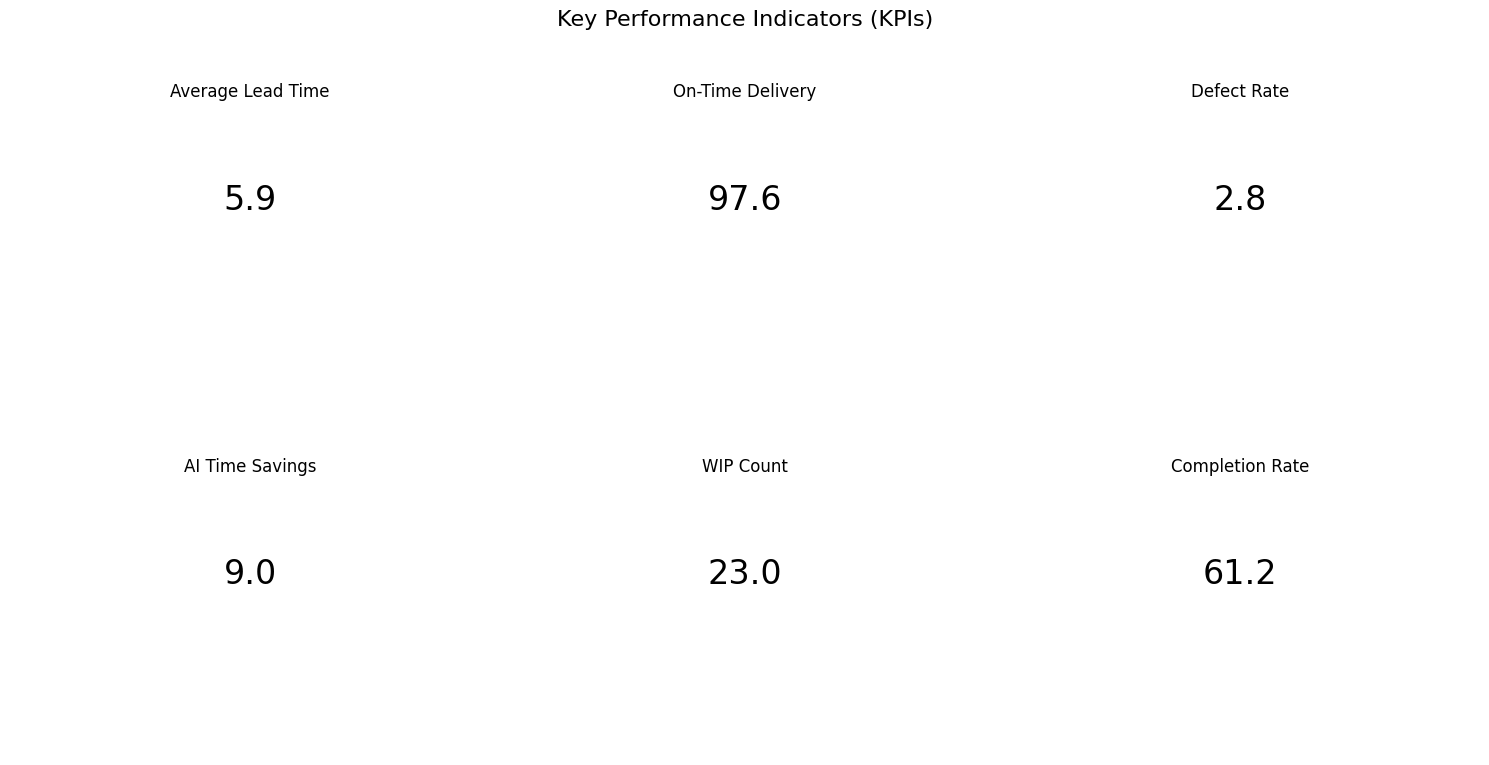

In [21]:
# Create a visualization of key KPIs

# Define KPIs
kpis = {
    'Average Lead Time': df['Lead Time'].mean(),
    'On-Time Delivery': (df['On Time?'] == 'YES').sum() / df['On Time?'].count() * 100,
    'Defect Rate': defect_percentage,
    'AI Time Savings': ai_time_saved,
    'WIP Count': status_counts['WIP'],
    'Completion Rate': (status_counts['Complete'] / status_counts.sum()) * 100
}

# Create figure
plt.figure(figsize=(15, 8))

# Create grid of KPI boxes
for i, (kpi_name, value) in enumerate(kpis.items()):
    plt.subplot(2, 3, i+1)
    plt.text(0.5, 0.5, f'{value:.1f}', 
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=24)
    plt.text(0.5, 0.8, kpi_name,
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=12)
    plt.axis('off')
    
plt.suptitle('Key Performance Indicators (KPIs)', fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

C:\Users\dharris\AppData\Local\Temp\ipykernel_8620\2615142927.py:68: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


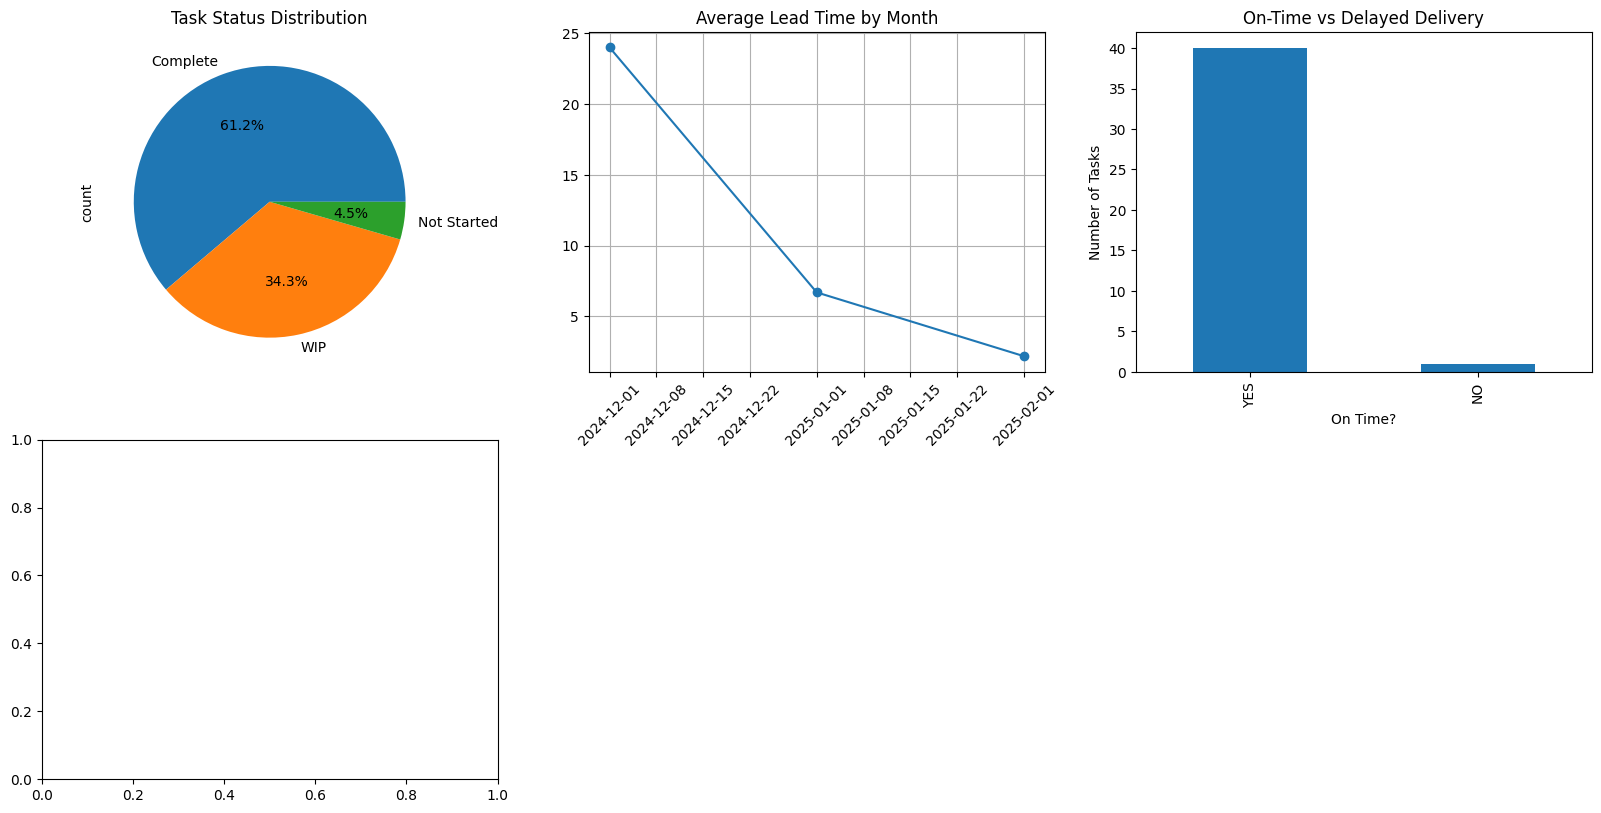

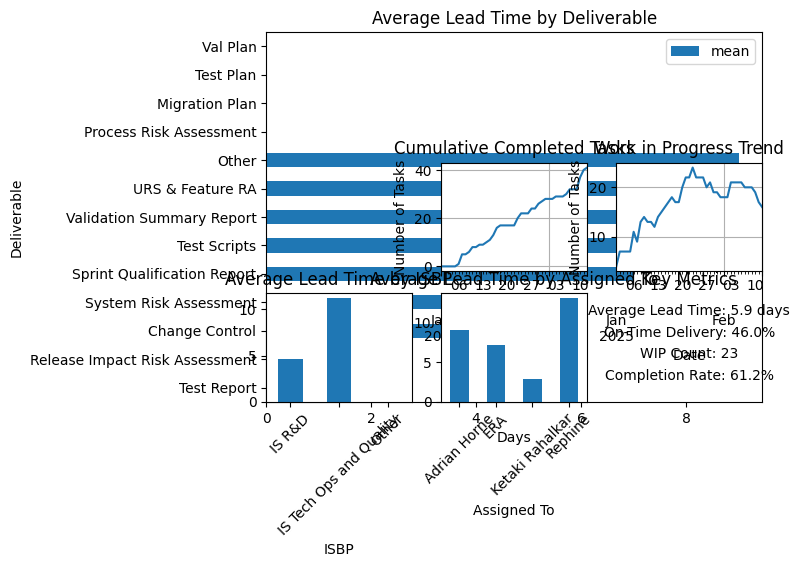

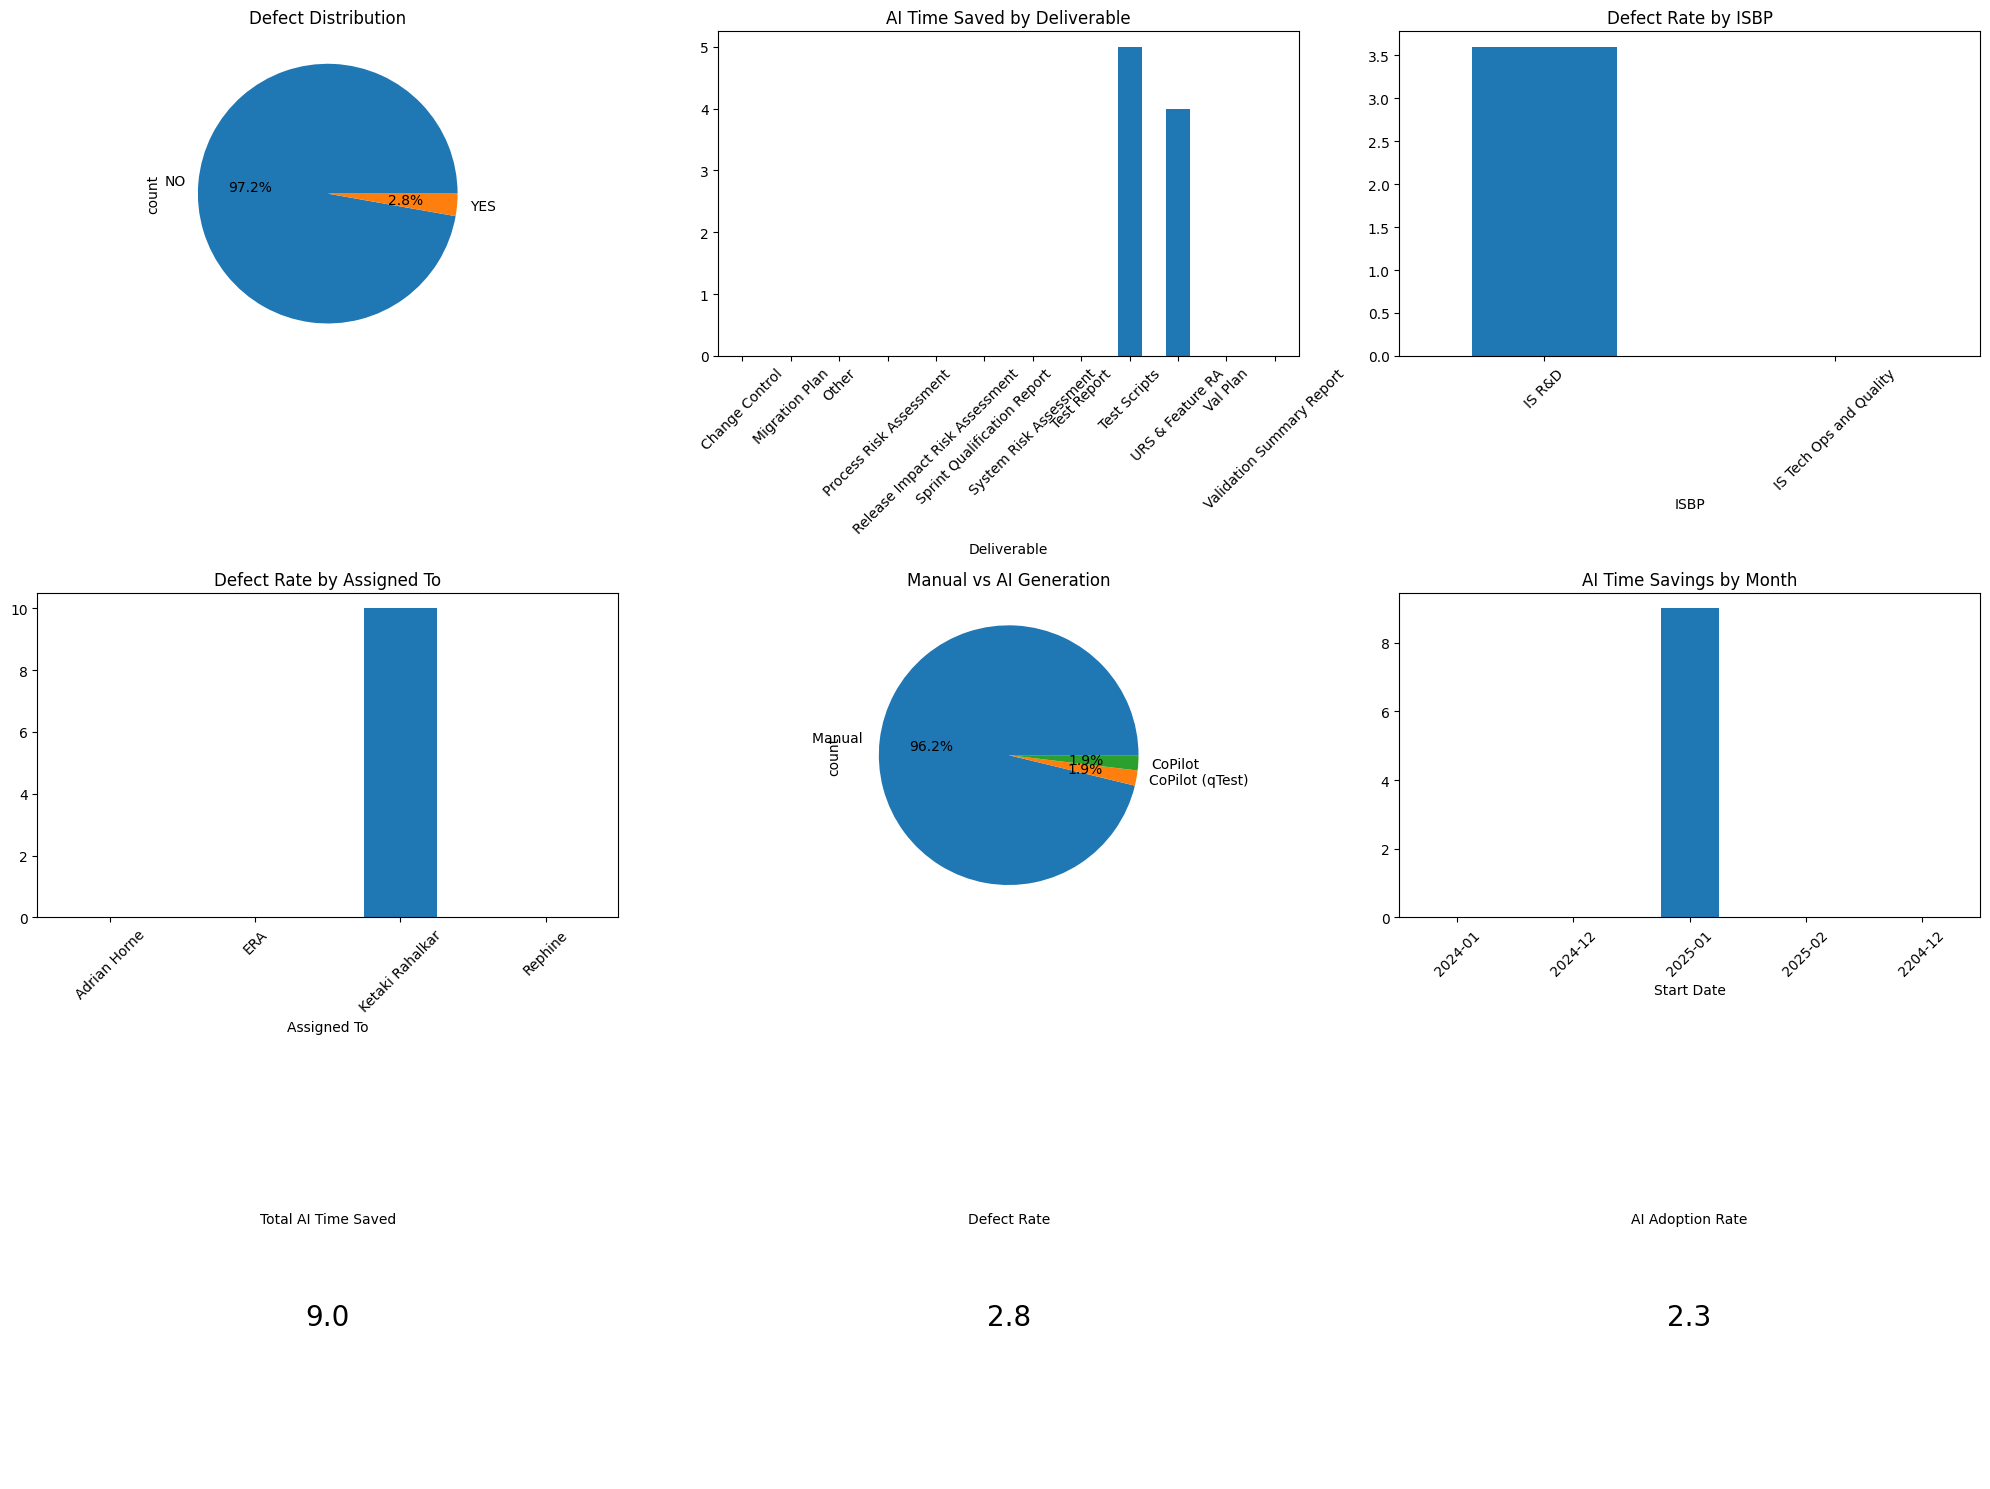

C:\Users\dharris\AppData\Local\Temp\ipykernel_8620\2615142927.py:173: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


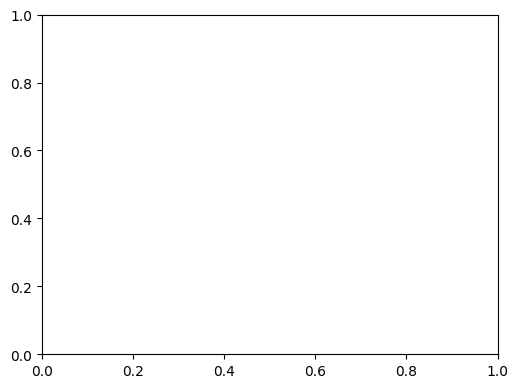

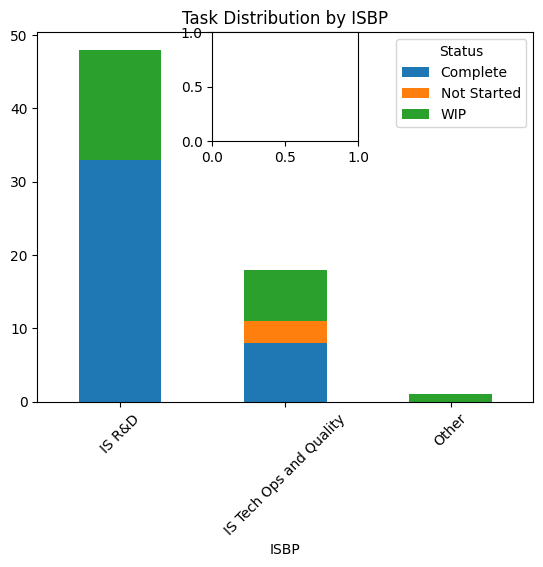

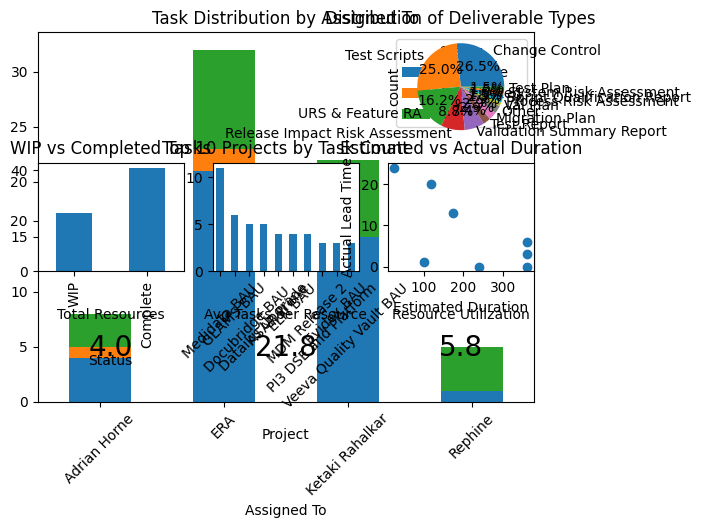

In [22]:
# Create three 3x3 grids of visualizations for performance analysis

# Grid 1 - Delivery Performance
plt.figure(figsize=(20, 15))

# 1. Status Distribution
plt.subplot(3, 3, 1)
status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Task Status Distribution')

# 2. Lead Time Trend
plt.subplot(3, 3, 2)
plt.plot(monthly_leadtime.index, monthly_leadtime.values, marker='o')
plt.title('Average Lead Time by Month')
plt.xticks(rotation=45)
plt.grid(True)

# 3. On-Time Delivery
plt.subplot(3, 3, 3)
on_time_counts = df['On Time?'].value_counts()
on_time_counts.plot(kind='bar')
plt.title('On-Time vs Delayed Delivery')
plt.ylabel('Number of Tasks')

# 4. Lead Time by Deliverable
plt.subplot(3, 3, 4)
deliverable_stats.sort_values('mean', ascending=True).plot(kind='barh', x='Deliverable', y='mean')
plt.title('Average Lead Time by Deliverable')
plt.xlabel('Days')

# 5. Completion Rate Over Time
plt.subplot(3, 3, 5)
cumulative_data['Complete'].plot()
plt.title('Cumulative Completed Tasks')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.grid(True)

# 6. WIP Trend
plt.subplot(3, 3, 6)
cumulative_data['WIP'].plot()
plt.title('Work in Progress Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.grid(True)

# 7. Lead Time by ISBP
plt.subplot(3, 3, 7)
isbp_lead['mean'].plot(kind='bar')
plt.title('Average Lead Time by ISBP')
plt.xticks(rotation=45)

# 8. Lead Time by Assigned To
plt.subplot(3, 3, 8)
assigned_lead['mean'].plot(kind='bar')
plt.title('Average Lead Time by Assigned To')
plt.xticks(rotation=45)

# 9. Key Performance Indicators
plt.subplot(3, 3, 9)
plt.text(0.5, 0.8, f'Average Lead Time: {df["Lead Time"].mean():.1f} days', ha='center')
plt.text(0.5, 0.6, f'On-Time Delivery: {(df["On Time?"] == "YES").mean()*100:.1f}%', ha='center')
plt.text(0.5, 0.4, f'WIP Count: {status_counts["WIP"]}', ha='center')
plt.text(0.5, 0.2, f'Completion Rate: {(status_counts["Complete"]/status_counts.sum())*100:.1f}%', ha='center')
plt.axis('off')
plt.title('Key Metrics')

plt.tight_layout()
plt.show()

# Grid 2 - Quality and Efficiency
plt.figure(figsize=(20, 15))

# 1. Defect Distribution
plt.subplot(3, 3, 1)
defect_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Defect Distribution')

# 2. AI Time Saved by Deliverable
plt.subplot(3, 3, 2)
ai_time_saved_by_deliverable.plot(kind='bar')
plt.title('AI Time Saved by Deliverable')
plt.xticks(rotation=45)

# 3. Defect Rate by ISBP
plt.subplot(3, 3, 3)
isbp_defect_rate.plot(kind='bar')
plt.title('Defect Rate by ISBP')
plt.xticks(rotation=45)

# 4. Defect Rate by Assigned To
plt.subplot(3, 3, 4)
assigned_defect_rate.plot(kind='bar')
plt.title('Defect Rate by Assigned To')
plt.xticks(rotation=45)

# 5. Manual vs AI Generation
plt.subplot(3, 3, 5)
df['AI or Manual Generation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Manual vs AI Generation')

# 6. AI Time Savings Trend
plt.subplot(3, 3, 6)
df.groupby(df['Start Date'].dt.to_period('M'))['AI Time Saved (hours)'].sum().plot(kind='bar')
plt.title('AI Time Savings by Month')
plt.xticks(rotation=45)

# 7-9. Quality Metrics
for i, (metric, value) in enumerate([
    ('Total AI Time Saved', ai_time_saved),
    ('Defect Rate', defect_percentage),
    ('AI Adoption Rate', len(df[df['AI or Manual Generation'].str.contains('AI|CoPilot', na=False)])/len(df)*100)
]):
    plt.subplot(3, 3, 7+i)
    plt.text(0.5, 0.5, f'{value:.1f}', ha='center', va='center', fontsize=20)
    plt.text(0.5, 0.8, metric, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Grid 3 - Resource Utilization
plt.figure(figsize=(20, 15))

# 1. Workload by ISBP
plt.subplot(3, 3, 1)
isbp_status.plot(kind='bar', stacked=True)
plt.title('Task Distribution by ISBP')
plt.xticks(rotation=45)

# 2. Workload by Assigned To
plt.subplot(3, 3, 2)
assigned_status.plot(kind='bar', stacked=True)
plt.title('Task Distribution by Assigned To')
plt.xticks(rotation=45)

# 3. Deliverable Distribution
plt.subplot(3, 3, 3)
df['Deliverable'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Deliverable Types')

# 4. Resource Capacity (WIP vs Complete)
plt.subplot(3, 3, 4)
status_counts[['WIP', 'Complete']].plot(kind='bar')
plt.title('WIP vs Completed Tasks')

# 5. Project Distribution
plt.subplot(3, 3, 5)
df['Project'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Projects by Task Count')
plt.xticks(rotation=45)

# 6. Estimated vs Actual Duration
plt.subplot(3, 3, 6)
plt.scatter(df['Estimated Duration (in days)'], df['Lead Time'])
plt.xlabel('Estimated Duration')
plt.ylabel('Actual Lead Time')
plt.title('Estimated vs Actual Duration')

# 7-9. Resource Metrics
metrics = [
    ('Total Resources', len(df['Assigned To'].unique())),
    ('Avg Tasks per Resource', len(df)/len(df['Assigned To'].unique())),
    ('Resource Utilization', status_counts['WIP']/len(df['Assigned To'].unique()))
]

for i, (metric, value) in enumerate(metrics):
    plt.subplot(3, 3, 7+i)
    plt.text(0.5, 0.5, f'{value:.1f}', ha='center', va='center', fontsize=20)
    plt.text(0.5, 0.8, metric, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

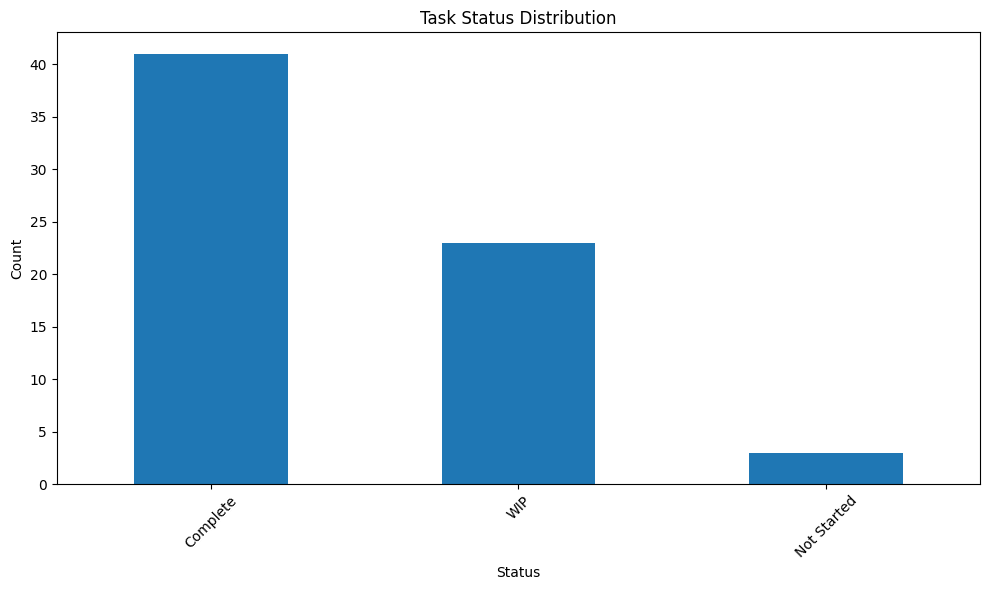

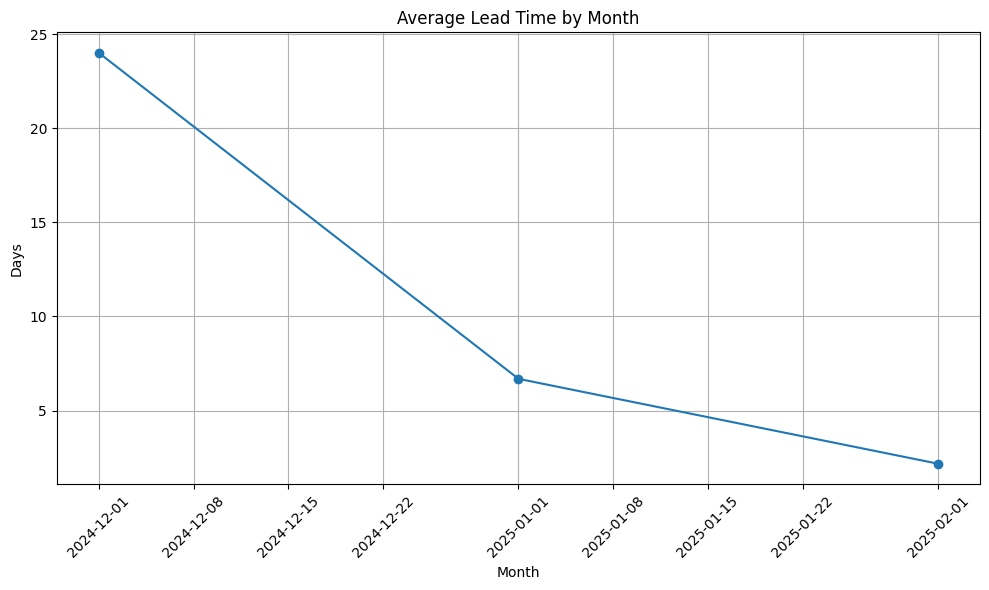

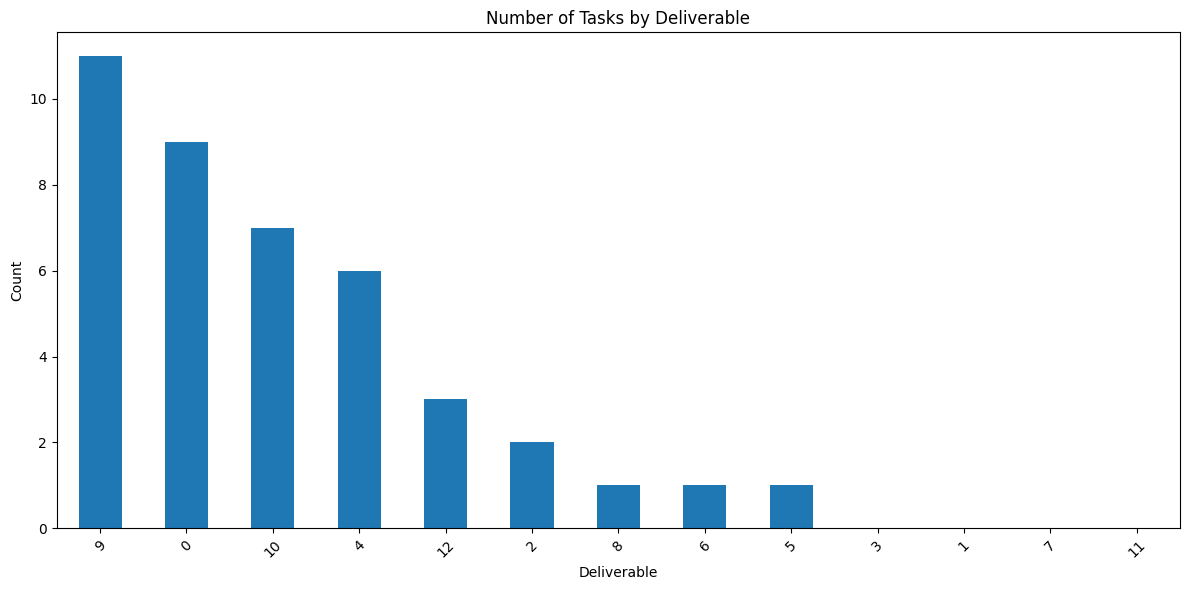

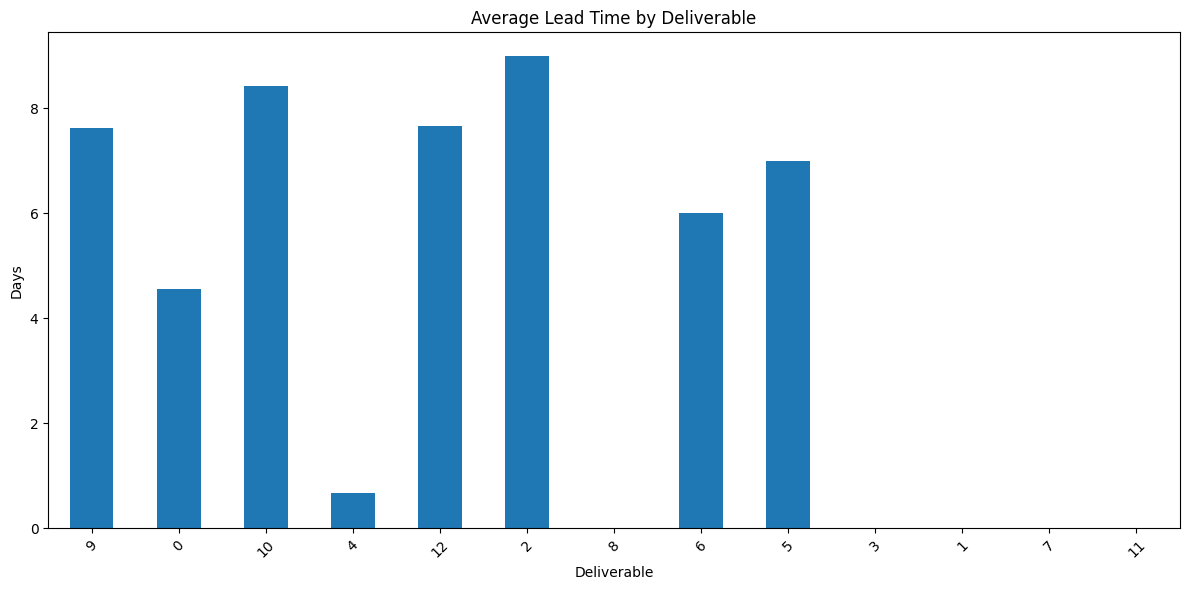

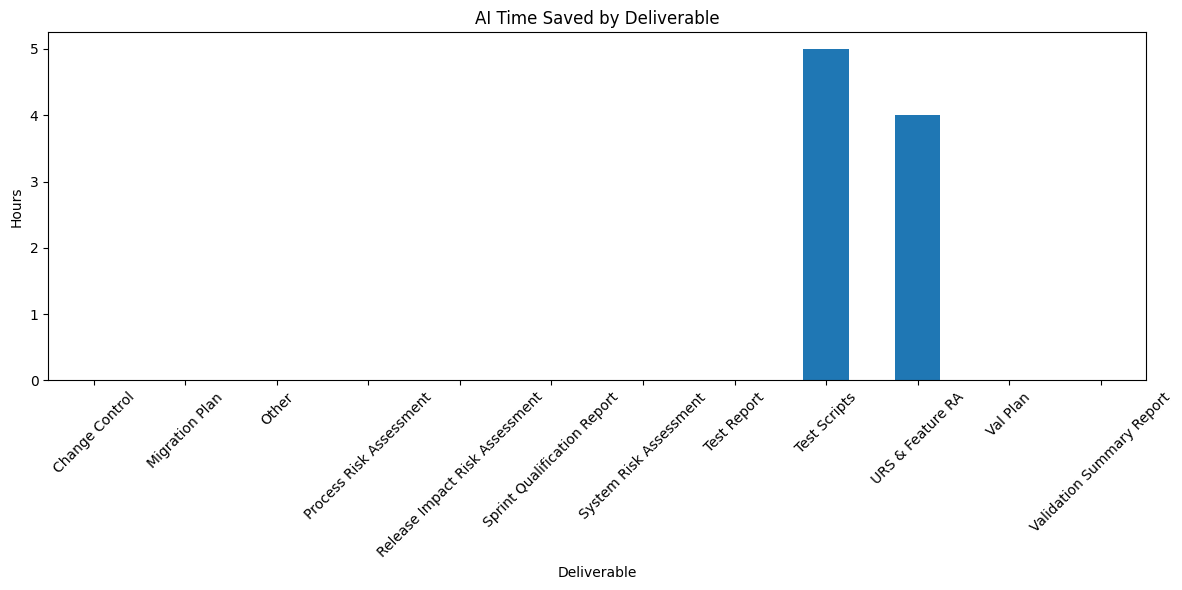

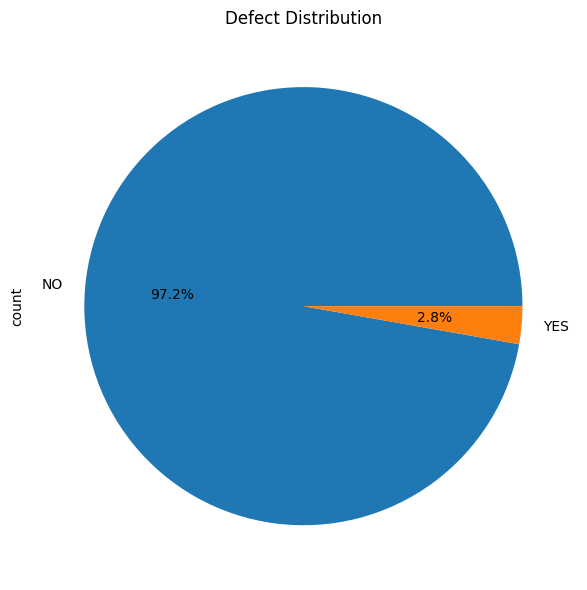

<Figure size 1000x600 with 0 Axes>

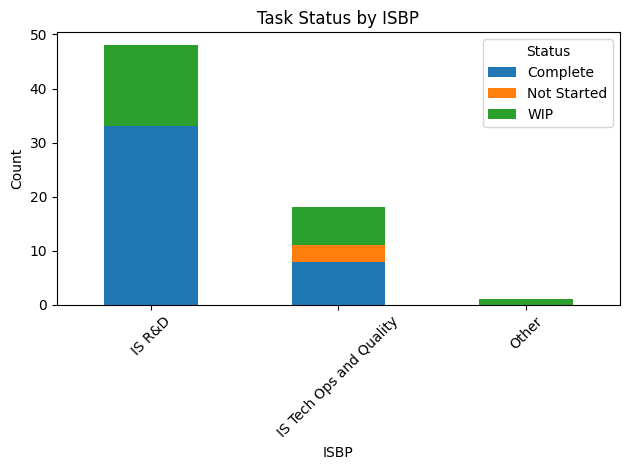

<Figure size 1000x600 with 0 Axes>

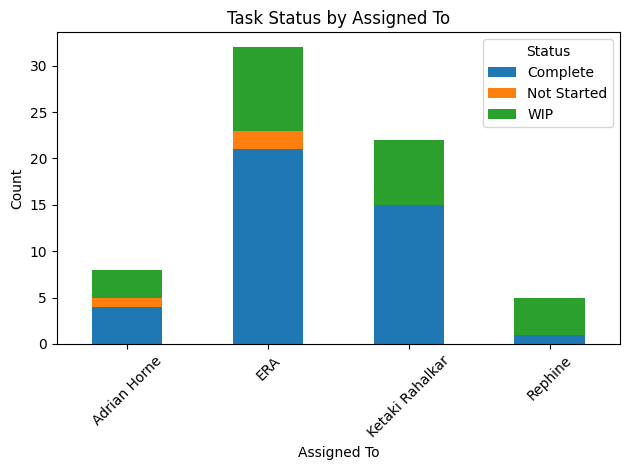

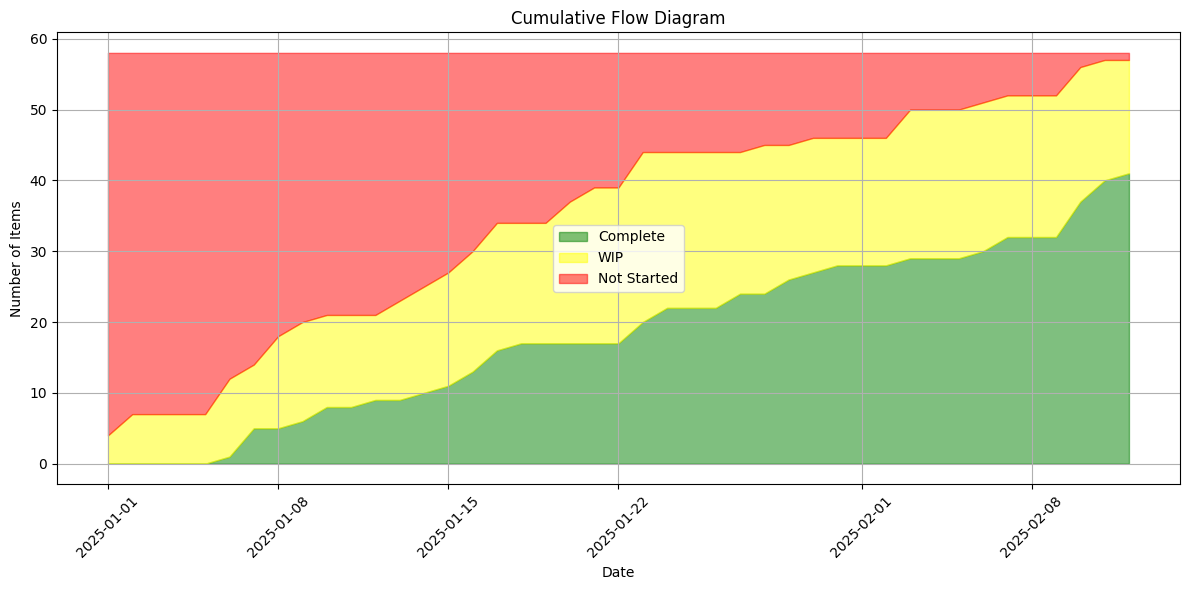

In [23]:
# Create individual charts

# 1. Status Distribution
plt.figure(figsize=(10,6))
status_counts.plot(kind='bar')
plt.title('Task Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Lead Time Trend
plt.figure(figsize=(10,6))
plt.plot(monthly_leadtime.index, monthly_leadtime.values, marker='o')
plt.title('Average Lead Time by Month')
plt.xlabel('Month')
plt.ylabel('Days')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Deliverable Distribution
plt.figure(figsize=(12,6))
deliverable_stats['count'].plot(kind='bar')
plt.title('Number of Tasks by Deliverable')
plt.xlabel('Deliverable')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Lead Time by Deliverable
plt.figure(figsize=(12,6))
deliverable_stats['mean'].plot(kind='bar')
plt.title('Average Lead Time by Deliverable')
plt.xlabel('Deliverable')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. AI Time Saved by Deliverable
plt.figure(figsize=(12,6))
ai_time_saved_by_deliverable.plot(kind='bar')
plt.title('AI Time Saved by Deliverable')
plt.xlabel('Deliverable')
plt.ylabel('Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Defect Distribution
plt.figure(figsize=(8,6))
defect_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Defect Distribution')
plt.tight_layout()
plt.show()

# 7. Task Status by ISBP
plt.figure(figsize=(10,6))
isbp_status.plot(kind='bar', stacked=True)
plt.title('Task Status by ISBP')
plt.xlabel('ISBP')
plt.ylabel('Count')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Task Status by Assigned To
plt.figure(figsize=(10,6))
assigned_status.plot(kind='bar', stacked=True)
plt.title('Task Status by Assigned To')
plt.xlabel('Assigned To')
plt.ylabel('Count')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Cumulative Flow
plt.figure(figsize=(12,6))
plt.fill_between(cumulative_data.index, cumulative_data['Complete'], 
                 color='green', alpha=0.5, label='Complete')
plt.fill_between(cumulative_data.index, cumulative_data['Complete'] + cumulative_data['WIP'], 
                 cumulative_data['Complete'], color='yellow', alpha=0.5, label='WIP')
plt.fill_between(cumulative_data.index, cumulative_data['Complete'] + cumulative_data['WIP'] + cumulative_data['Not Started'], 
                 cumulative_data['Complete'] + cumulative_data['WIP'], color='red', alpha=0.5, label='Not Started')
plt.title('Cumulative Flow Diagram')
plt.xlabel('Date')
plt.ylabel('Number of Items')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\dharris\AppData\Local\Temp\ipykernel_8620\525702581.py:70: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


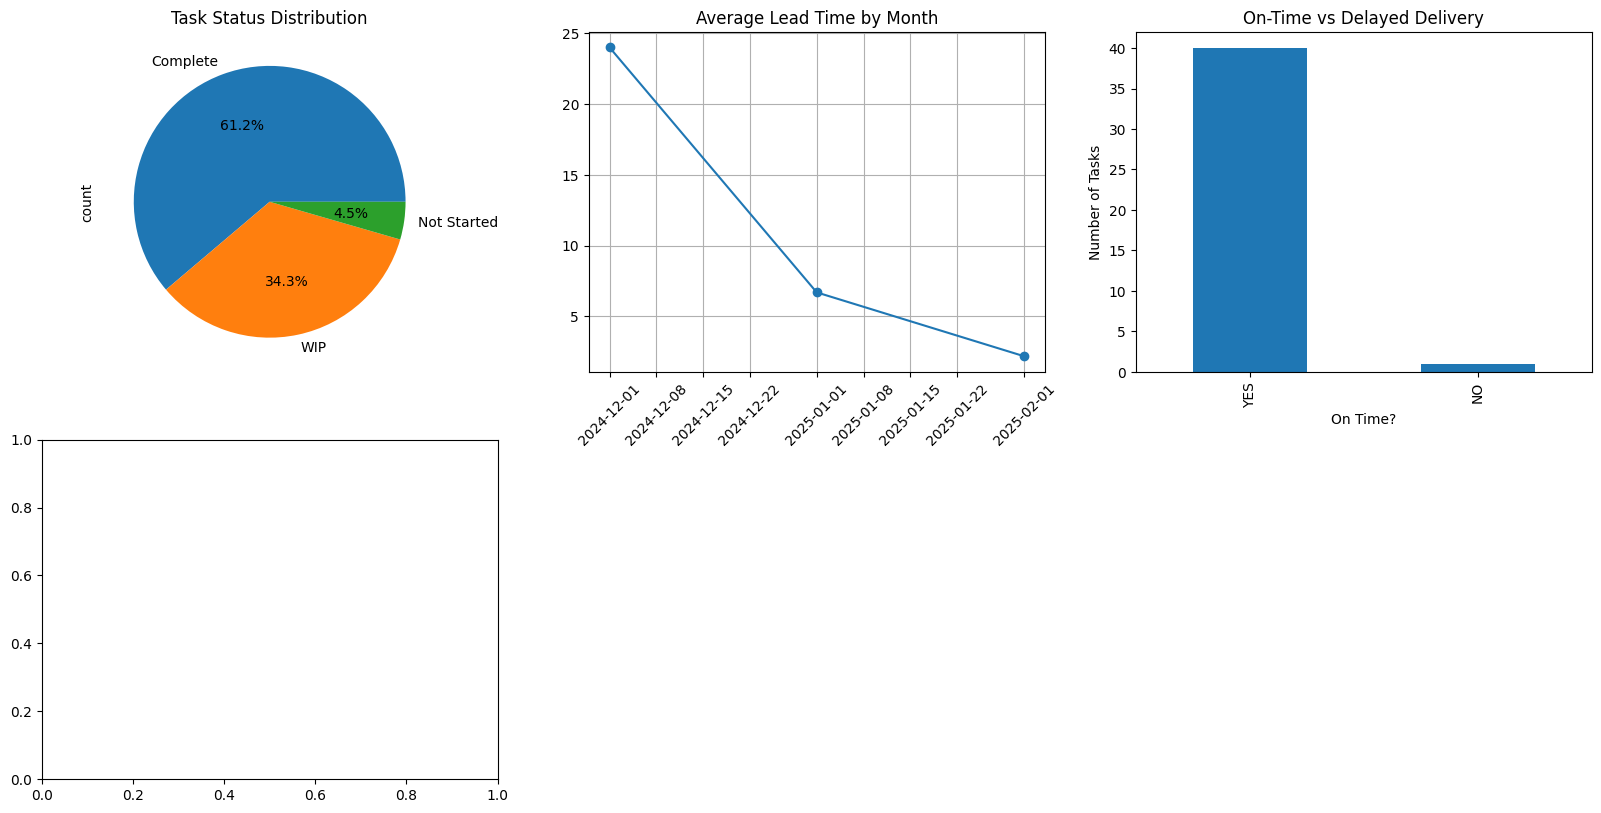

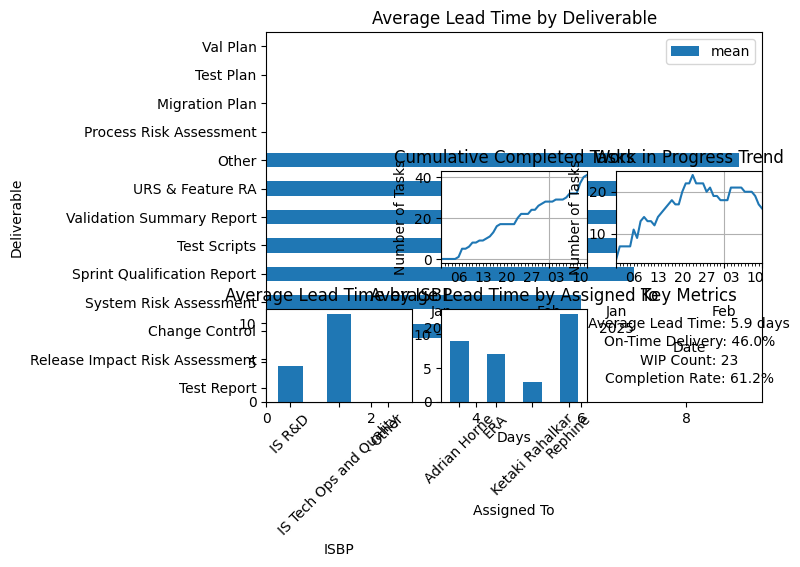

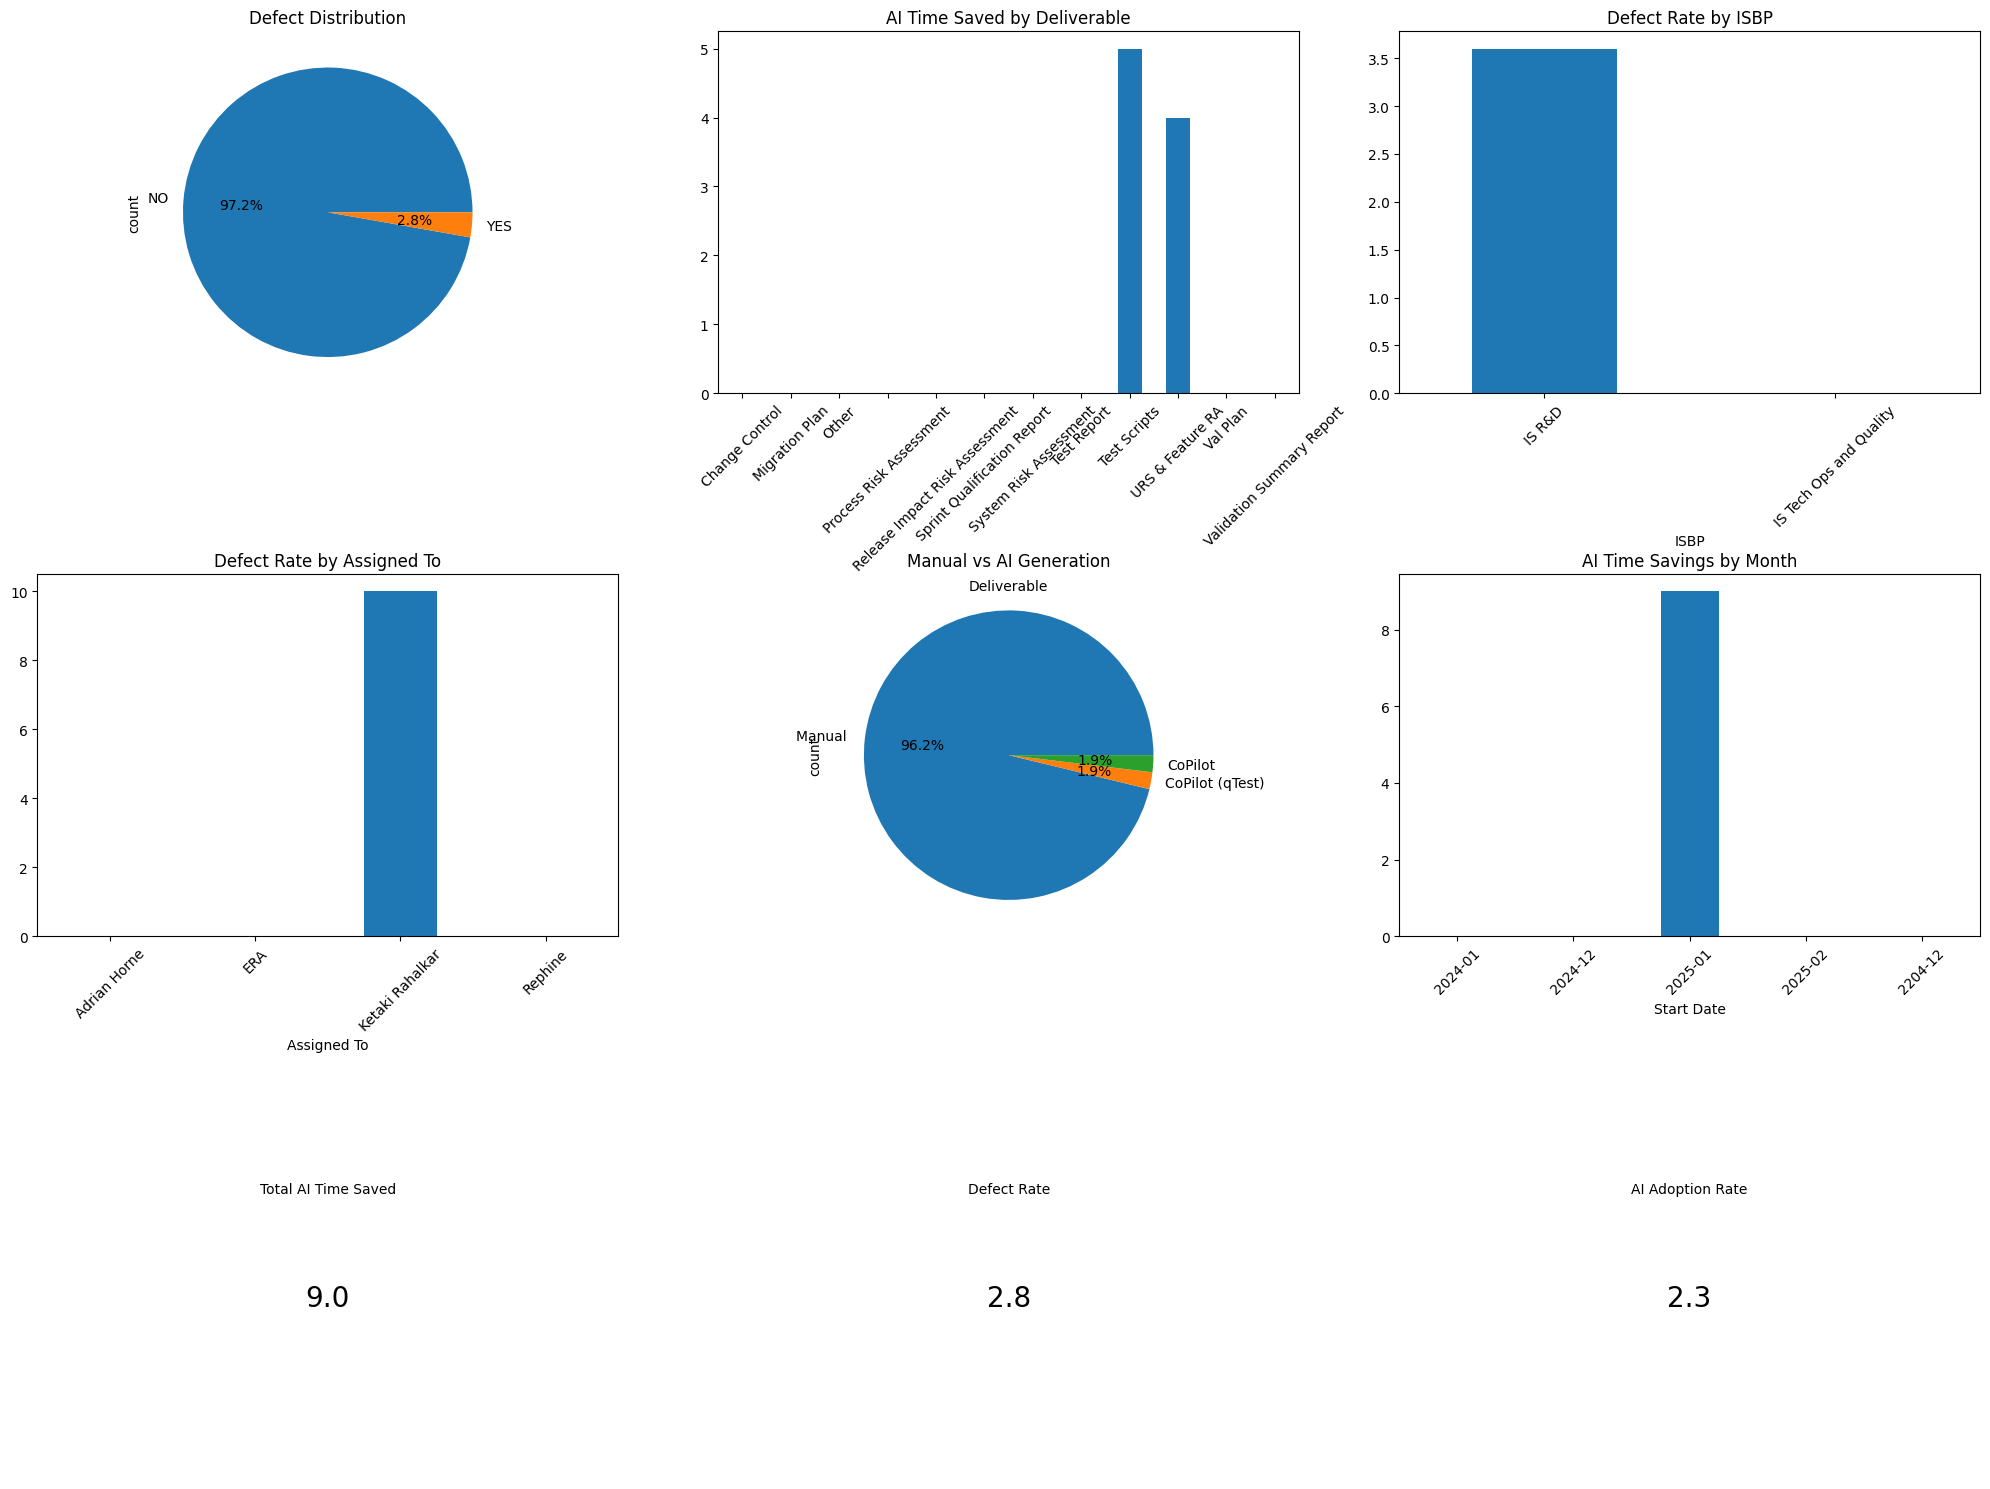

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [24]:
import matplotlib.pyplot as plt

# Create three 3x3 grids of visualizations for performance analysis

### Grid 1 - Delivery Performance ###
plt.figure(figsize=(20, 15))

# 1. Status Distribution
plt.subplot(3, 3, 1)
status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Task Status Distribution')

# 2. Lead Time Trend
plt.subplot(3, 3, 2)
plt.plot(monthly_leadtime.index, monthly_leadtime.values, marker='o')
plt.title('Average Lead Time by Month')
plt.xticks(rotation=45)
plt.grid(True)

# 3. On-Time Delivery
plt.subplot(3, 3, 3)
on_time_counts = df['On Time?'].value_counts()
on_time_counts.plot(kind='bar')
plt.title('On-Time vs Delayed Delivery')
plt.ylabel('Number of Tasks')

# 4. Lead Time by Deliverable
plt.subplot(3, 3, 4)
deliverable_stats.sort_values('mean', ascending=True).plot(kind='barh', x='Deliverable', y='mean')
plt.title('Average Lead Time by Deliverable')
plt.xlabel('Days')

# 5. Completion Rate Over Time
plt.subplot(3, 3, 5)
cumulative_data['Complete'].plot()
plt.title('Cumulative Completed Tasks')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.grid(True)

# 6. WIP Trend
plt.subplot(3, 3, 6)
cumulative_data['WIP'].plot()
plt.title('Work in Progress Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.grid(True)

# 7. Lead Time by ISBP
plt.subplot(3, 3, 7)
isbp_lead['mean'].plot(kind='bar')
plt.title('Average Lead Time by ISBP')
plt.xticks(rotation=45)

# 8. Lead Time by Assigned To
plt.subplot(3, 3, 8)
assigned_lead['mean'].plot(kind='bar')
plt.title('Average Lead Time by Assigned To')
plt.xticks(rotation=45)

# 9. Key Performance Indicators
plt.subplot(3, 3, 9)
plt.text(0.5, 0.8, f'Average Lead Time: {df["Lead Time"].mean():.1f} days', ha='center')
plt.text(0.5, 0.6, f'On-Time Delivery: {(df["On Time?"] == "YES").mean()*100:.1f}%', ha='center')
plt.text(0.5, 0.4, f'WIP Count: {status_counts["WIP"]}', ha='center')
plt.text(0.5, 0.2, f'Completion Rate: {(status_counts["Complete"]/status_counts.sum())*100:.1f}%', ha='center')
plt.axis('off')
plt.title('Key Metrics')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

### Grid 2 - Quality and Efficiency ###
plt.figure(figsize=(20, 15))

# 1. Defect Distribution
plt.subplot(3, 3, 1)
defect_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Defect Distribution')

# 2. AI Time Saved by Deliverable
plt.subplot(3, 3, 2)
ai_time_saved_by_deliverable.plot(kind='bar')
plt.title('AI Time Saved by Deliverable')
plt.xticks(rotation=45)

# 3. Defect Rate by ISBP
plt.subplot(3, 3, 3)
isbp_defect_rate.plot(kind='bar')
plt.title('Defect Rate by ISBP')
plt.xticks(rotation=45)

# 4. Defect Rate by Assigned To
plt.subplot(3, 3, 4)
assigned_defect_rate.plot(kind='bar')
plt.title('Defect Rate by Assigned To')
plt.xticks(rotation=45)

# 5. Manual vs AI Generation
plt.subplot(3, 3, 5)
df['AI or Manual Generation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Manual vs AI Generation')

# 6. AI Time Savings Trend
plt.subplot(3, 3, 6)
df.groupby(df['Start Date'].dt.to_period('M'))['AI Time Saved (hours)'].sum().plot(kind='bar')
plt.title('AI Time Savings by Month')
plt.xticks(rotation=45)

# 7-9. Quality Metrics
quality_metrics = [
    ('Total AI Time Saved', ai_time_saved),
    ('Defect Rate', defect_percentage),
    ('AI Adoption Rate', len(df[df['AI or Manual Generation'].str.contains('AI|CoPilot', na=False)])/len(df)*100)
]

for i, (metric, value) in enumerate(quality_metrics):
    plt.subplot(3, 3, 7 + i)
    plt.text(0.5, 0.5, f'{value:.1f}', ha='center', va='center', fontsize=20)
    plt.text(0.5, 0.8, metric, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

### Grid 3 - Resource Utilization ###
plt.figure


C:\Users\dharris\AppData\Local\Temp\ipykernel_8620\3302520742.py:74: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


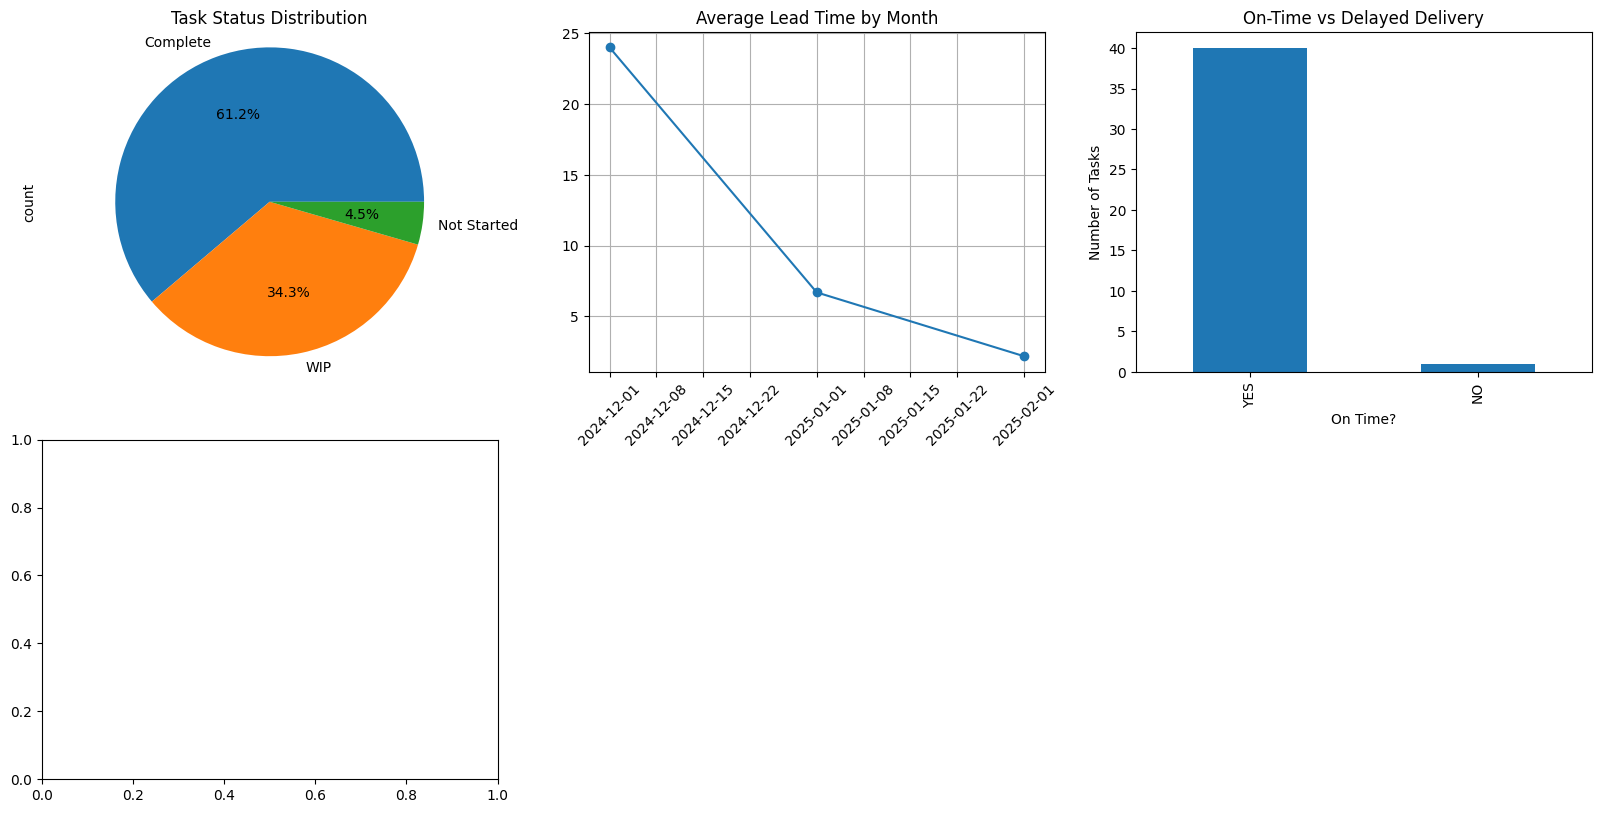

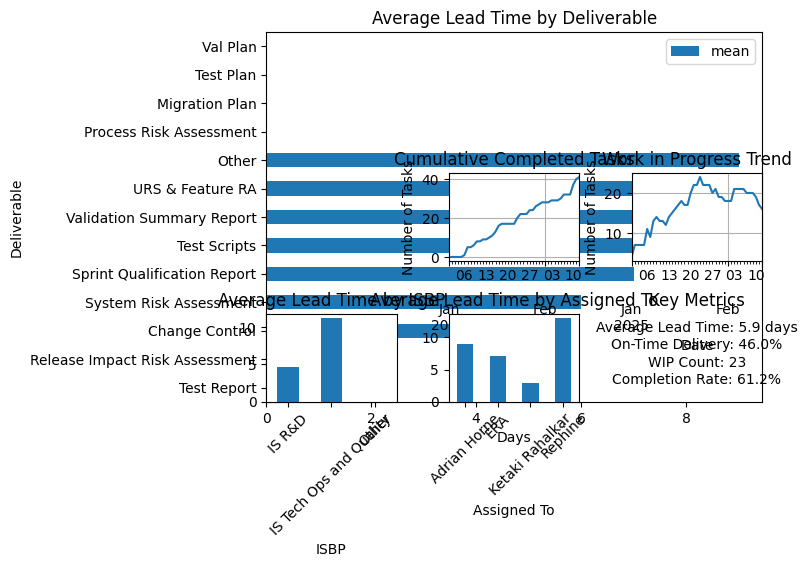

<Figure size 640x480 with 0 Axes>

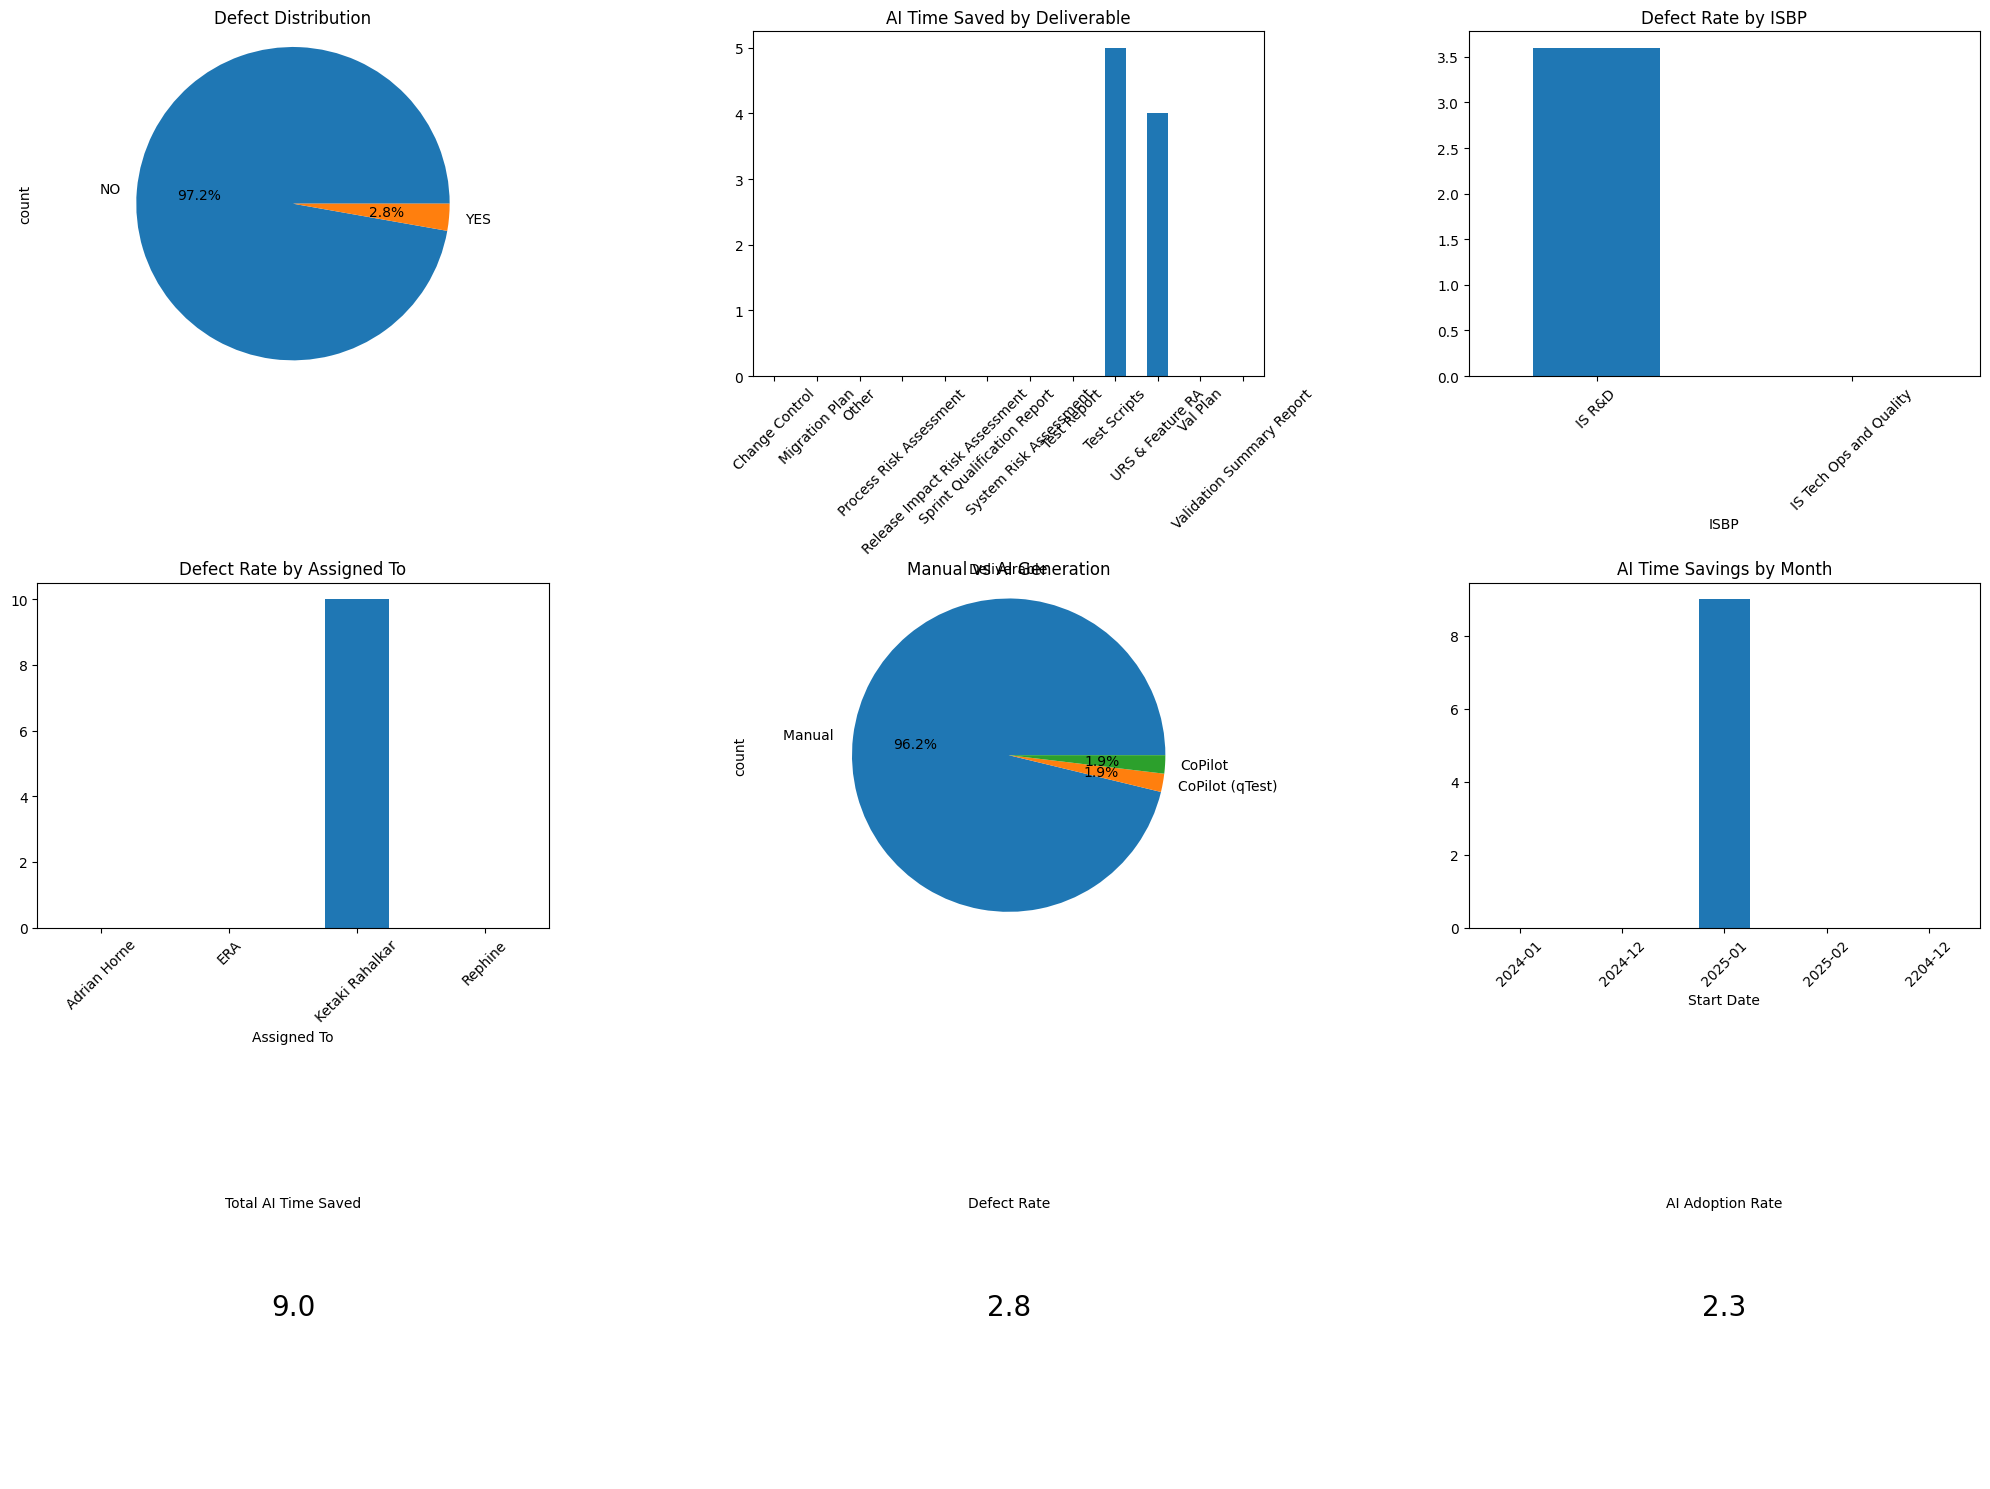

C:\Users\dharris\AppData\Local\Temp\ipykernel_8620\3302520742.py:188: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

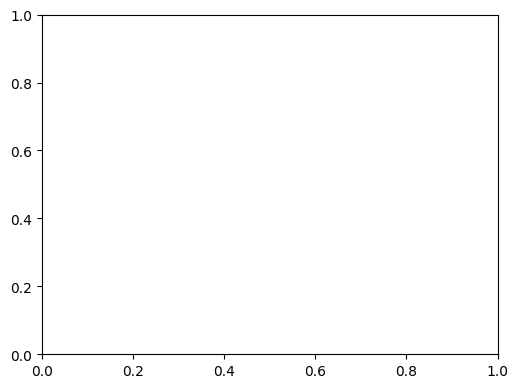

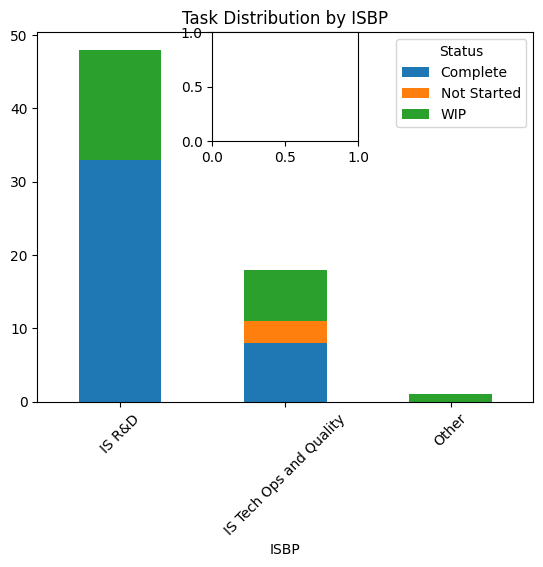

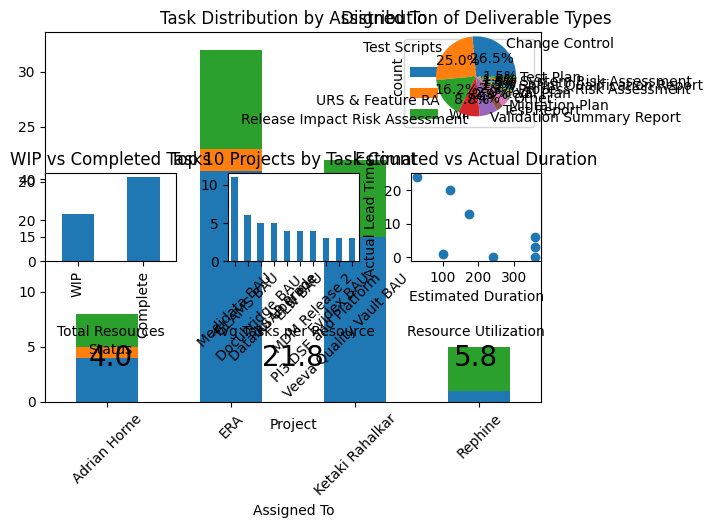

In [25]:
import matplotlib.pyplot as plt

# Ensure a clean slate before plotting
plt.close('all')

# Create three 3x3 grids of visualizations for performance analysis

### Grid 1 - Delivery Performance ###
plt.figure(figsize=(20, 15))

# 1. Status Distribution
plt.subplot(3, 3, 1)
status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Task Status Distribution')
plt.axis('equal')  # Ensure pie chart is circular

# 2. Lead Time Trend
plt.subplot(3, 3, 2)
plt.plot(monthly_leadtime.index, monthly_leadtime.values, marker='o')
plt.title('Average Lead Time by Month')
plt.xticks(rotation=45)
plt.grid(True)

# 3. On-Time Delivery
plt.subplot(3, 3, 3)
on_time_counts = df['On Time?'].value_counts()
on_time_counts.plot(kind='bar')
plt.title('On-Time vs Delayed Delivery')
plt.ylabel('Number of Tasks')

# 4. Lead Time by Deliverable
plt.subplot(3, 3, 4)
deliverable_stats.sort_values('mean', ascending=True).plot(kind='barh', x='Deliverable', y='mean')
plt.title('Average Lead Time by Deliverable')
plt.xlabel('Days')

# 5. Completion Rate Over Time
plt.subplot(3, 3, 5)
cumulative_data['Complete'].plot()
plt.title('Cumulative Completed Tasks')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.grid(True)

# 6. WIP Trend
plt.subplot(3, 3, 6)
cumulative_data['WIP'].plot()
plt.title('Work in Progress Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.grid(True)

# 7. Lead Time by ISBP
plt.subplot(3, 3, 7)
isbp_lead['mean'].plot(kind='bar')
plt.title('Average Lead Time by ISBP')
plt.xticks(rotation=45)

# 8. Lead Time by Assigned To
plt.subplot(3, 3, 8)
assigned_lead['mean'].plot(kind='bar')
plt.title('Average Lead Time by Assigned To')
plt.xticks(rotation=45)

# 9. Key Performance Indicators
plt.subplot(3, 3, 9)
plt.text(0.5, 0.8, f'Average Lead Time: {df["Lead Time"].mean():.1f} days', ha='center')
plt.text(0.5, 0.6, f'On-Time Delivery: {(df["On Time?"] == "YES").mean()*100:.1f}%', ha='center')
plt.text(0.5, 0.4, f'WIP Count: {status_counts["WIP"]}', ha='center')
plt.text(0.5, 0.2, f'Completion Rate: {(status_counts["Complete"]/status_counts.sum())*100:.1f}%', ha='center')
plt.axis('off')
plt.title('Key Metrics')

plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()

### Grid 2 - Quality and Efficiency ###
plt.clf()  # Clear previous figure
plt.figure(figsize=(20, 15))

# 1. Defect Distribution
plt.subplot(3, 3, 1)
defect_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Defect Distribution')
plt.axis('equal')  # Ensure pie chart is circular

# 2. AI Time Saved by Deliverable
plt.subplot(3, 3, 2)
ai_time_saved_by_deliverable.plot(kind='bar')
plt.title('AI Time Saved by Deliverable')
plt.xticks(rotation=45)

# 3. Defect Rate by ISBP
plt.subplot(3, 3, 3)
isbp_defect_rate.plot(kind='bar')
plt.title('Defect Rate by ISBP')
plt.xticks(rotation=45)

# 4. Defect Rate by Assigned To
plt.subplot(3, 3, 4)
assigned_defect_rate.plot(kind='bar')
plt.title('Defect Rate by Assigned To')
plt.xticks(rotation=45)

# 5. Manual vs AI Generation
plt.subplot(3, 3, 5)
df['AI or Manual Generation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Manual vs AI Generation')
plt.axis('equal')  # Ensure pie chart is circular

# 6. AI Time Savings Trend
plt.subplot(3, 3, 6)
df.groupby(df['Start Date'].dt.to_period('M'))['AI Time Saved (hours)'].sum().plot(kind='bar')
plt.title('AI Time Savings by Month')
plt.xticks(rotation=45)

# 7-9. Quality Metrics
quality_metrics = [
    ('Total AI Time Saved', ai_time_saved),
    ('Defect Rate', defect_percentage),
    ('AI Adoption Rate', len(df[df['AI or Manual Generation'].str.contains('AI|CoPilot', na=False)])/len(df)*100)
]

for i, (metric, value) in enumerate(quality_metrics):
    plt.subplot(3, 3, 7 + i)
    plt.text(0.5, 0.5, f'{value:.1f}', ha='center', va='center', fontsize=20)
    plt.text(0.5, 0.8, metric, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()

### Grid 3 - Resource Utilization ###
plt.clf()  # Clear previous figure
plt.figure(figsize=(20, 15))

# 1. Workload by ISBP
plt.subplot(3, 3, 1)
isbp_status.plot(kind='bar', stacked=True)
plt.title('Task Distribution by ISBP')
plt.xticks(rotation=45)

# 2. Workload by Assigned To
plt.subplot(3, 3, 2)
assigned_status.plot(kind='bar', stacked=True)
plt.title('Task Distribution by Assigned To')
plt.xticks(rotation=45)

# 3. Deliverable Distribution
plt.subplot(3, 3, 3)
df['Deliverable'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Deliverable Types')
plt.axis('equal')  # Ensure pie chart is circular

# 4. Resource Capacity (WIP vs Complete)
plt.subplot(3, 3, 4)
status_counts[['WIP', 'Complete']].plot(kind='bar')
plt.title('WIP vs Completed Tasks')

# 5. Project Distribution
plt.subplot(3, 3, 5)
df['Project'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Projects by Task Count')
plt.xticks(rotation=45)

# 6. Estimated vs Actual Duration
plt.subplot(3, 3, 6)
plt.scatter(df['Estimated Duration (in days)'], df['Lead Time'])
plt.xlabel('Estimated Duration')
plt.ylabel('Actual Lead Time')
plt.title('Estimated vs Actual Duration')

# 7-9. Resource Metrics
resource_metrics = [
    ('Total Resources', len(df['Assigned To'].unique())),
    ('Avg Tasks per Resource', len(df) / len(df['Assigned To'].unique())),
    ('Resource Utilization', status_counts['WIP'] / len(df['Assigned To'].unique()))
]

for i, (metric, value) in enumerate(resource_metrics):
    plt.subplot(3, 3, 7 + i)
    plt.text(0.5, 0.5, f'{value:.1f}', ha='center', va='center', fontsize=20)
    plt.text(0.5, 0.8, metric, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()


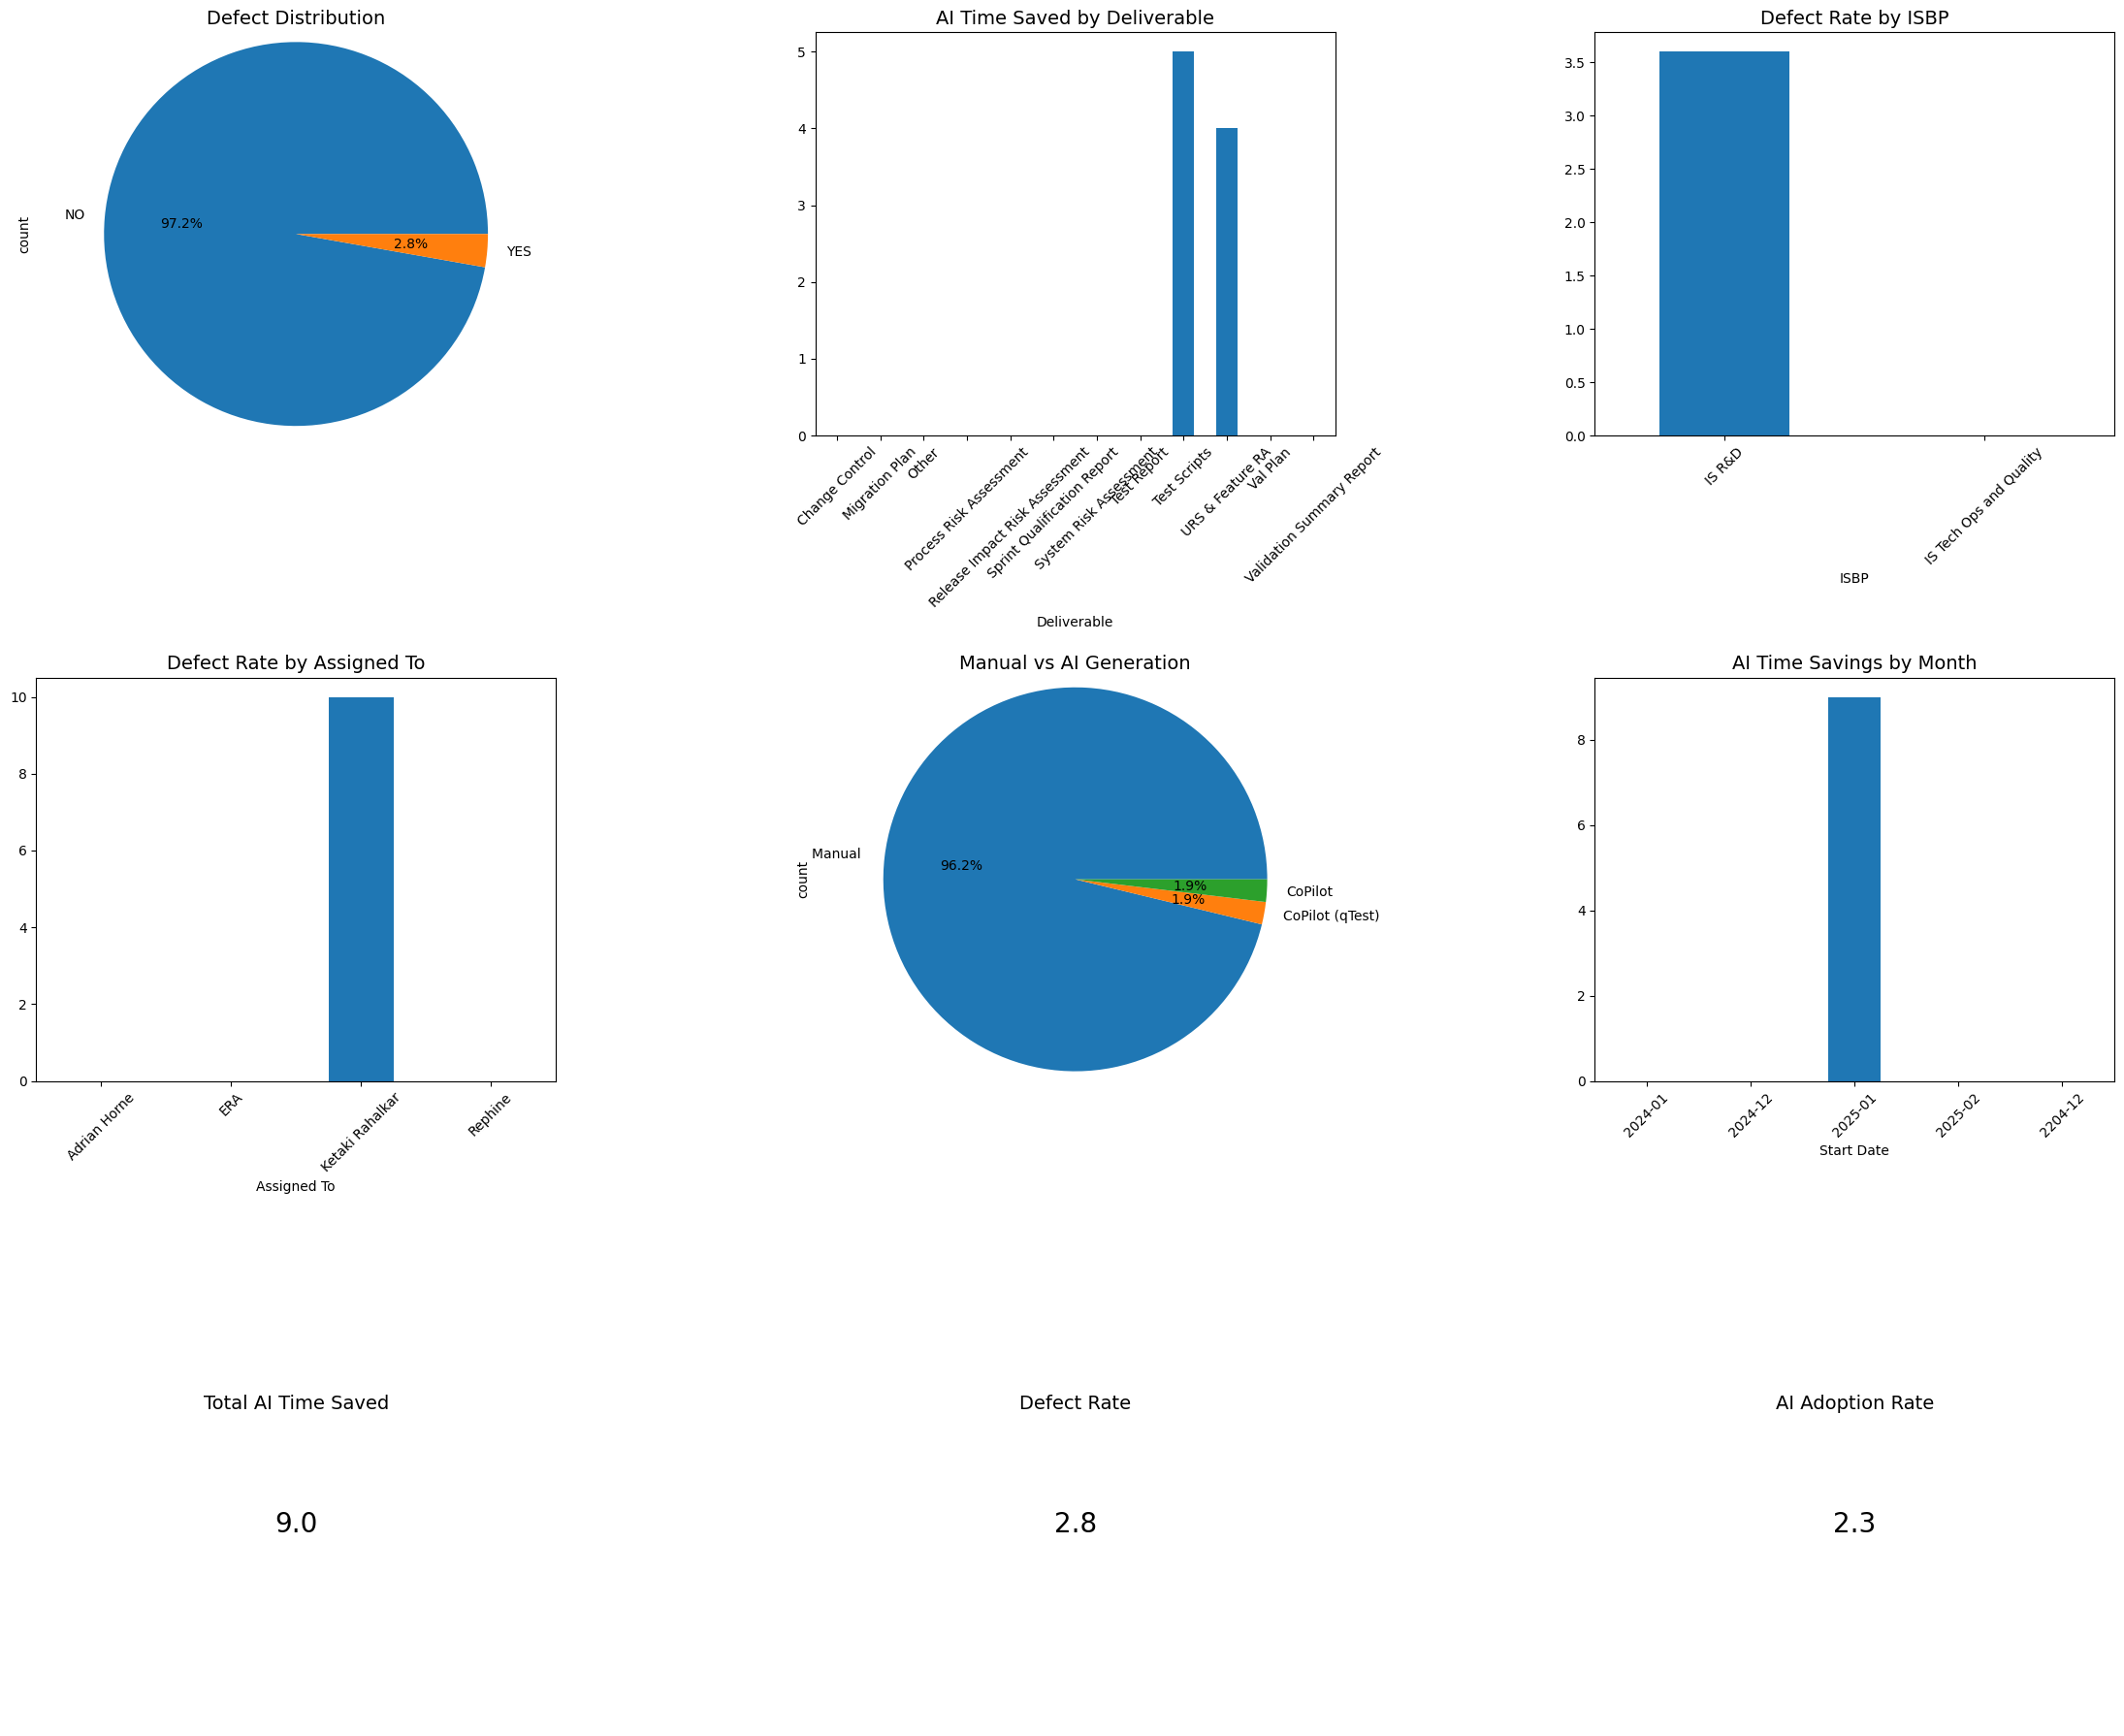

In [26]:
import matplotlib.pyplot as plt

# Ensure a clean slate before plotting
plt.close('all')

### Grid 2 - Quality and Efficiency ###
fig, axes = plt.subplots(3, 3, figsize=(22, 18))  # Increased figure size

# 1. Defect Distribution
df['Defects'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 0])
axes[0, 0].set_title('Defect Distribution', fontsize=14)
axes[0, 0].axis('equal')  # Ensure pie chart is circular

# 2. AI Time Saved by Deliverable
ai_time_saved_by_deliverable.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('AI Time Saved by Deliverable', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Defect Rate by ISBP
isbp_defect_rate.plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Defect Rate by ISBP', fontsize=14)
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Defect Rate by Assigned To
assigned_defect_rate.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Defect Rate by Assigned To', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Manual vs AI Generation
df['AI or Manual Generation'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set_title('Manual vs AI Generation', fontsize=14)
axes[1, 1].axis('equal')

# 6. AI Time Savings Trend
df.groupby(df['Start Date'].dt.to_period('M'))['AI Time Saved (hours)'].sum().plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('AI Time Savings by Month', fontsize=14)
axes[1, 2].tick_params(axis='x', rotation=45)

# 7-9. Quality Metrics - Use text-based visualizations
quality_metrics = [
    ('Total AI Time Saved', ai_time_saved),
    ('Defect Rate', defect_percentage),
    ('AI Adoption Rate', len(df[df['AI or Manual Generation'].str.contains('AI|CoPilot', na=False)])/len(df)*100)
]

for i, (metric, value) in enumerate(quality_metrics):
    axes[2, i].text(0.5, 0.5, f'{value:.1f}', ha='center', va='center', fontsize=20)
    axes[2, i].text(0.5, 0.8, metric, ha='center', va='center', fontsize=14)
    axes[2, i].axis('off')

# Improve layout spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.5)
plt.show()


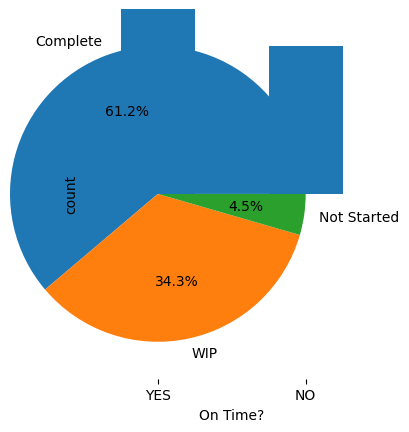

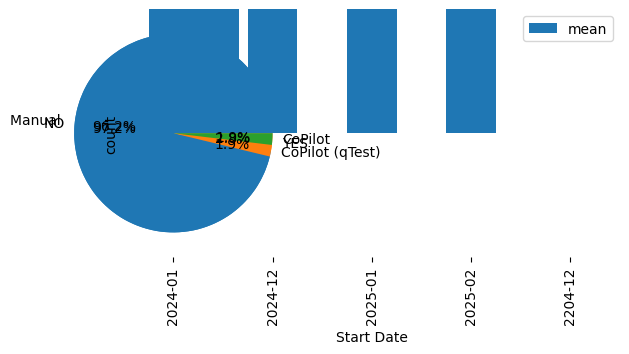

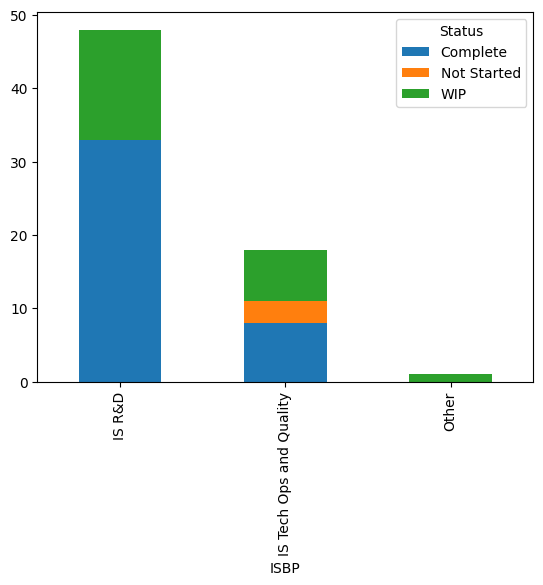

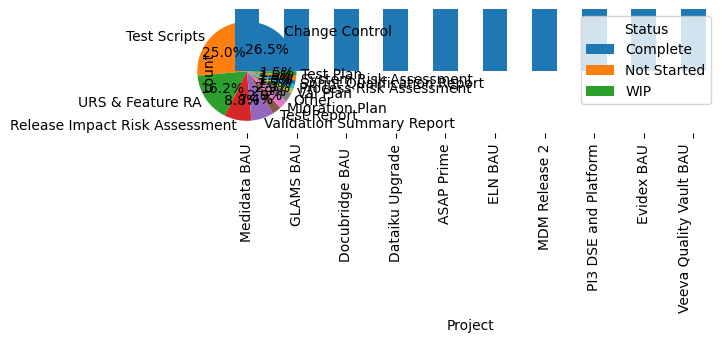

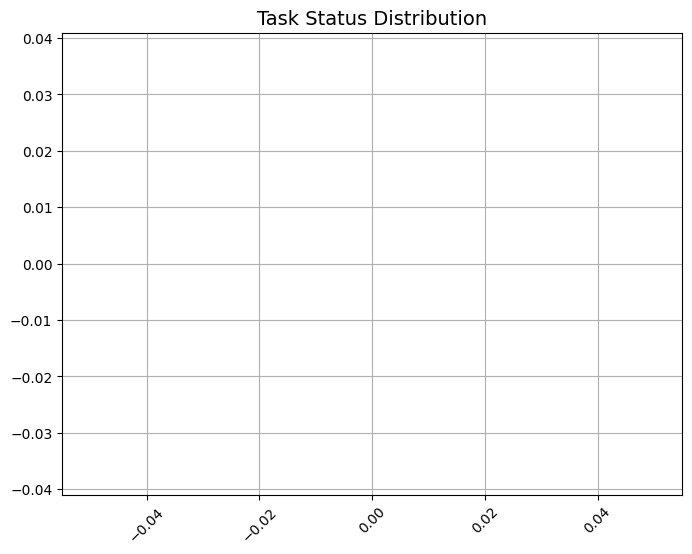

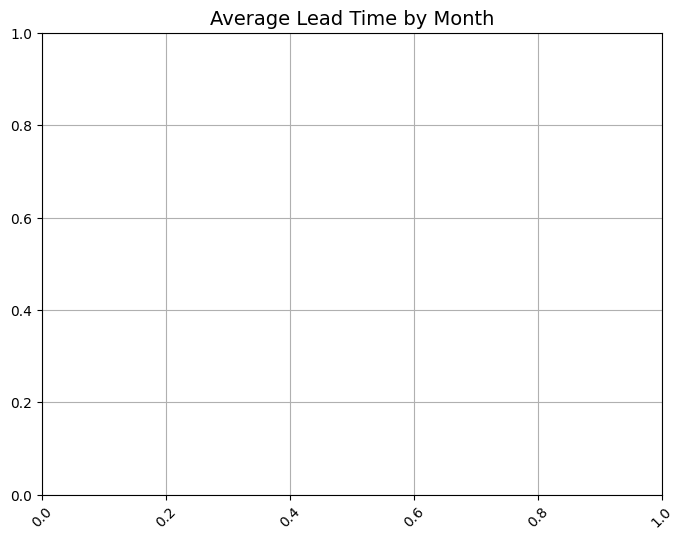

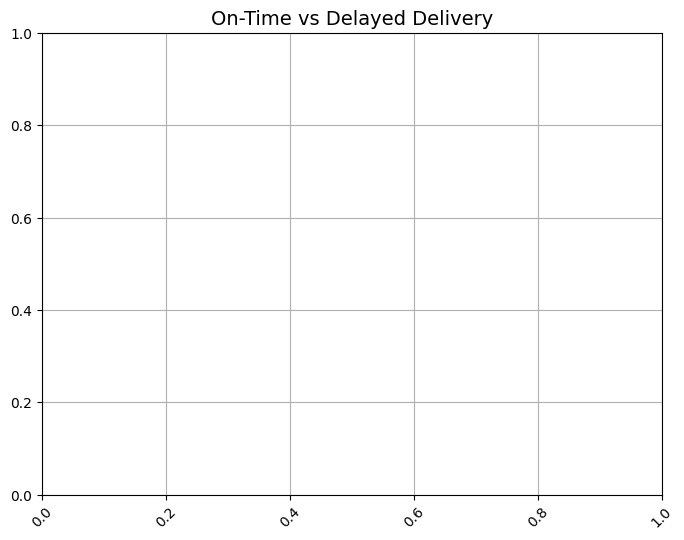

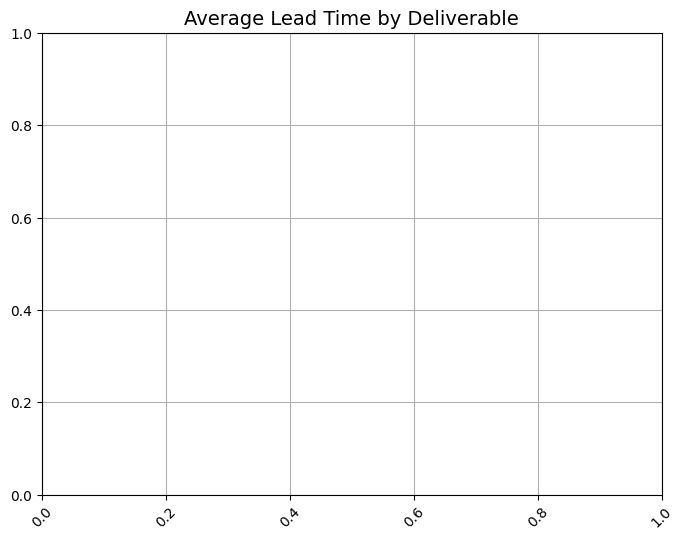

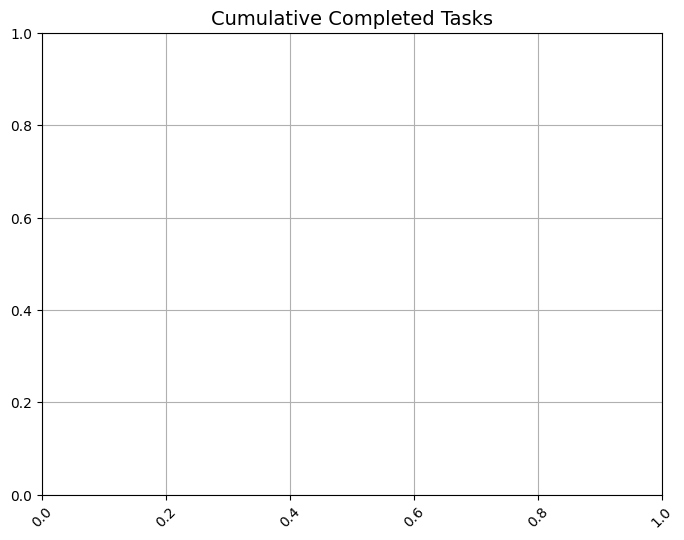

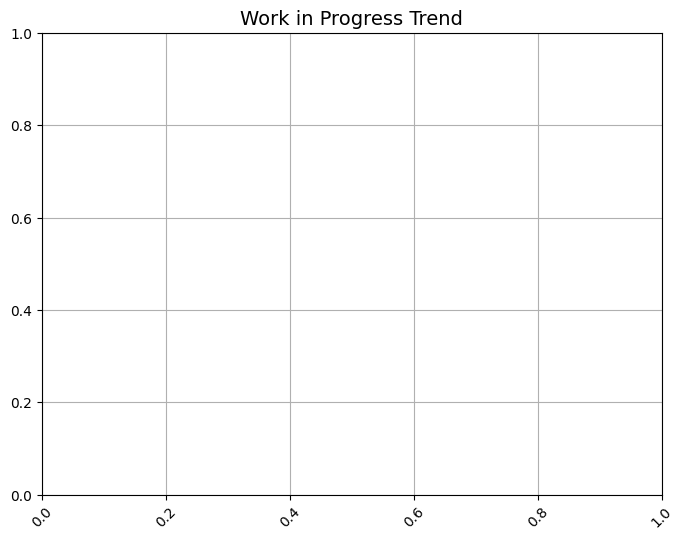

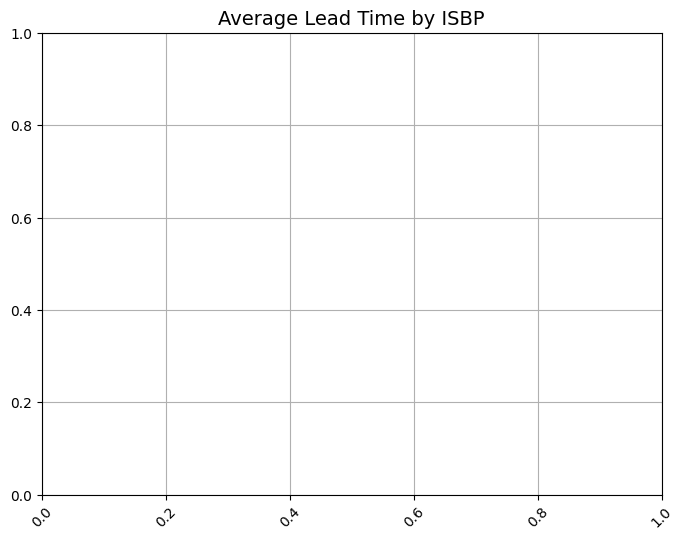

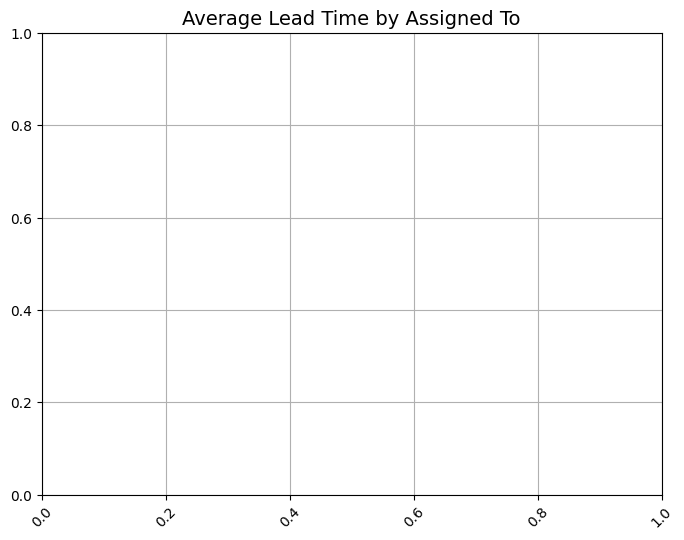

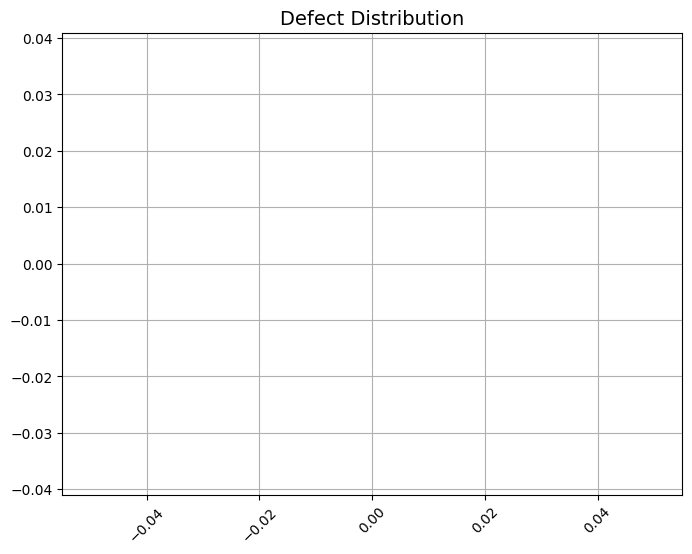

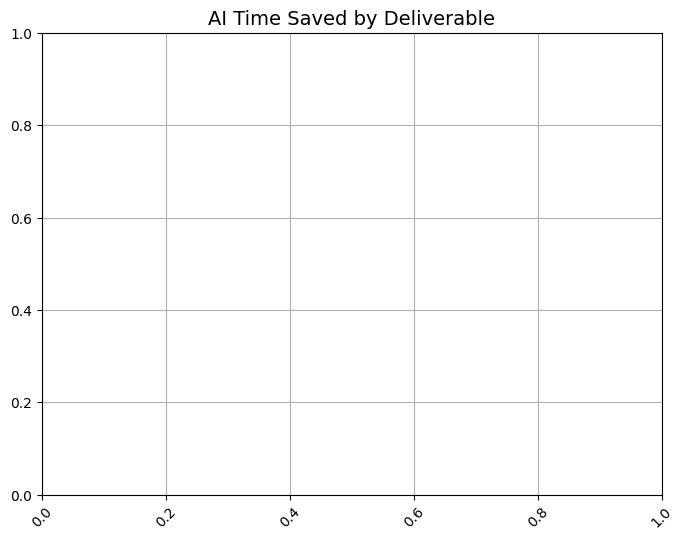

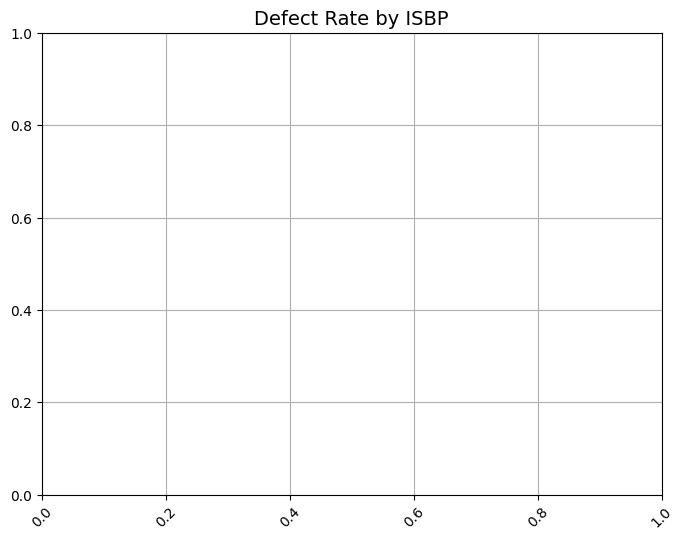

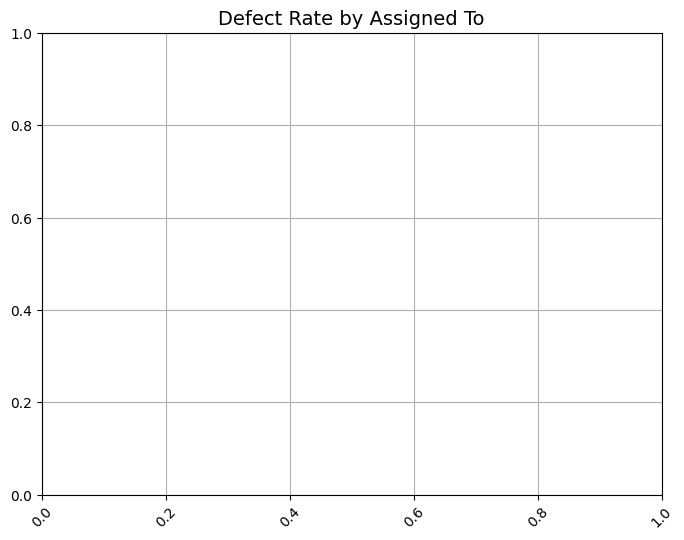

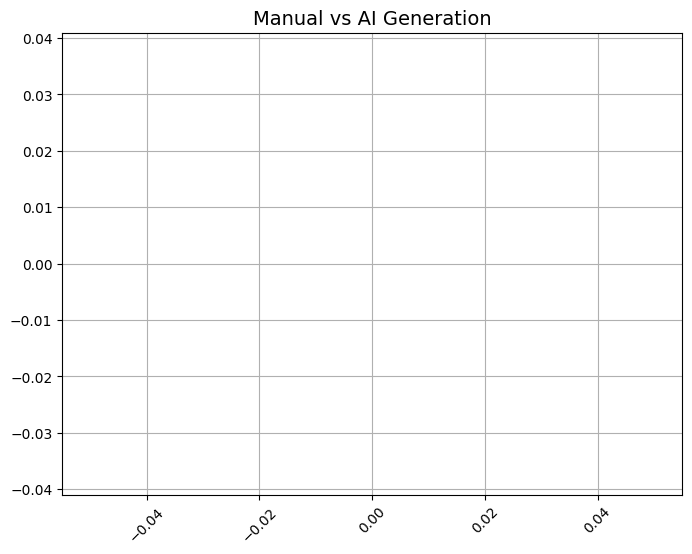

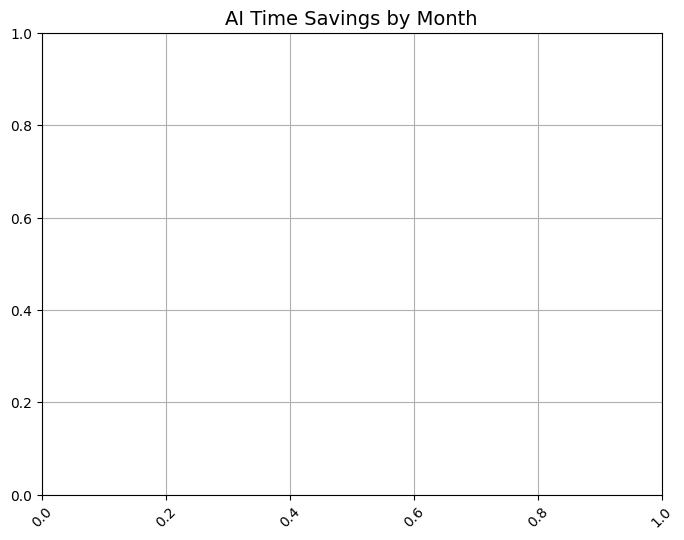

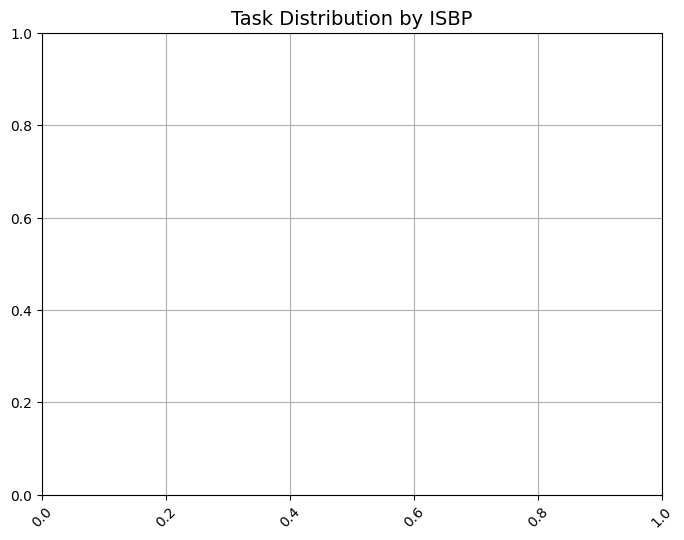

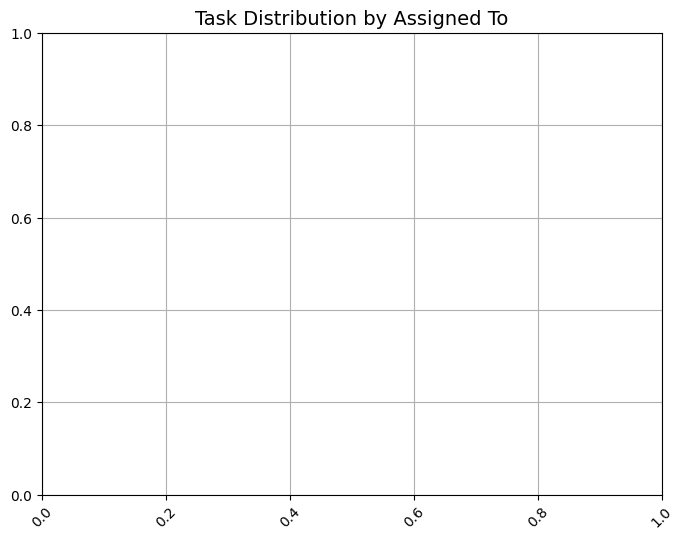

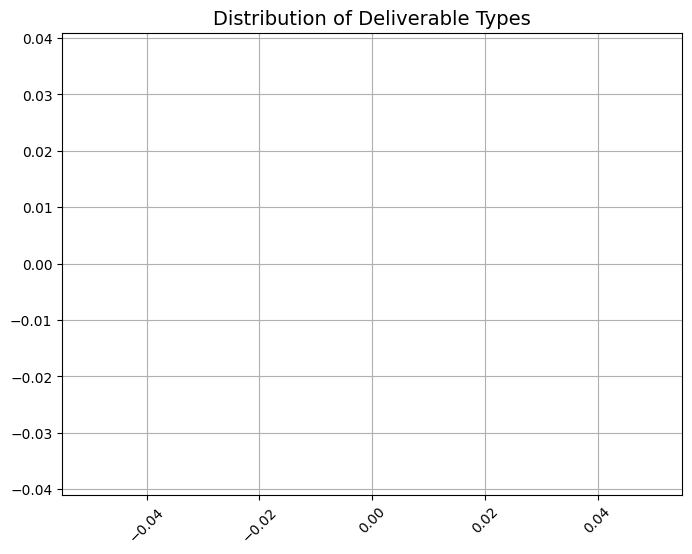

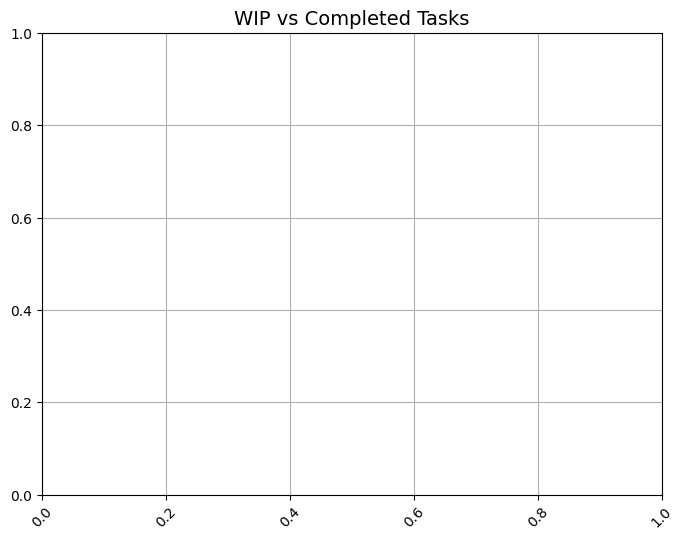

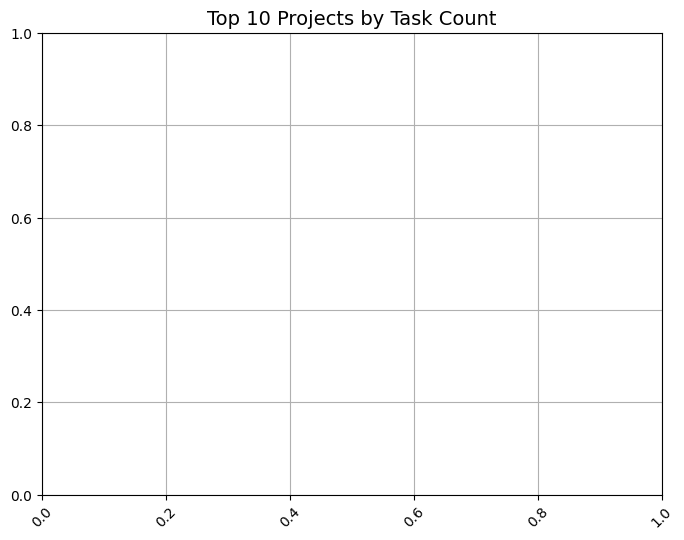

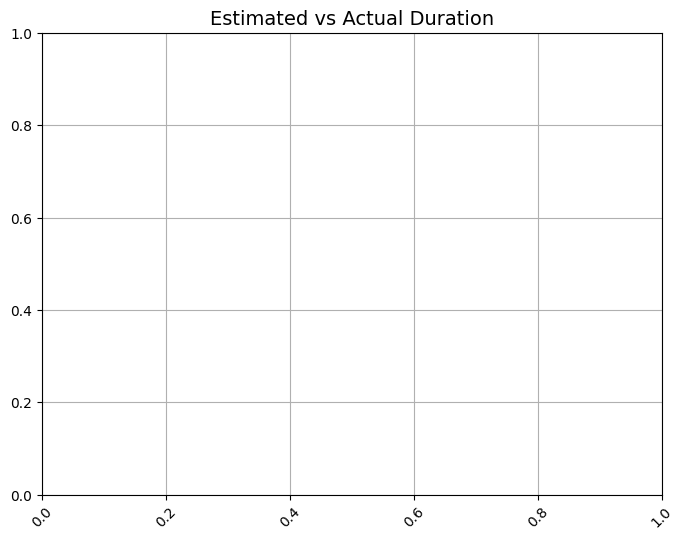

In [27]:
import matplotlib.pyplot as plt

# Ensure a clean slate before plotting
plt.close('all')

# List of plots to generate
plots = [
    ("Task Status Distribution", status_counts.plot(kind='pie', autopct='%1.1f%%'), 'equal'),
    ("Average Lead Time by Month", plt.plot(monthly_leadtime.index, monthly_leadtime.values, marker='o'), None),
    ("On-Time vs Delayed Delivery", on_time_counts.plot(kind='bar'), None),
    ("Average Lead Time by Deliverable", deliverable_stats.sort_values('mean', ascending=True).plot(kind='barh', x='Deliverable', y='mean'), None),
    ("Cumulative Completed Tasks", cumulative_data['Complete'].plot(), None),
    ("Work in Progress Trend", cumulative_data['WIP'].plot(), None),
    ("Average Lead Time by ISBP", isbp_lead['mean'].plot(kind='bar'), None),
    ("Average Lead Time by Assigned To", assigned_lead['mean'].plot(kind='bar'), None),
    ("Defect Distribution", defect_counts.plot(kind='pie', autopct='%1.1f%%'), 'equal'),
    ("AI Time Saved by Deliverable", ai_time_saved_by_deliverable.plot(kind='bar'), None),
    ("Defect Rate by ISBP", isbp_defect_rate.plot(kind='bar'), None),
    ("Defect Rate by Assigned To", assigned_defect_rate.plot(kind='bar'), None),
    ("Manual vs AI Generation", df['AI or Manual Generation'].value_counts().plot(kind='pie', autopct='%1.1f%%'), 'equal'),
    ("AI Time Savings by Month", df.groupby(df['Start Date'].dt.to_period('M'))['AI Time Saved (hours)'].sum().plot(kind='bar'), None),
    ("Task Distribution by ISBP", isbp_status.plot(kind='bar', stacked=True), None),
    ("Task Distribution by Assigned To", assigned_status.plot(kind='bar', stacked=True), None),
    ("Distribution of Deliverable Types", df['Deliverable'].value_counts().plot(kind='pie', autopct='%1.1f%%'), 'equal'),
    ("WIP vs Completed Tasks", status_counts[['WIP', 'Complete']].plot(kind='bar'), None),
    ("Top 10 Projects by Task Count", df['Project'].value_counts().head(10).plot(kind='bar'), None),
    ("Estimated vs Actual Duration", plt.scatter(df['Estimated Duration (in days)'], df['Lead Time']), None)
]

# Generate each plot separately
for title, plot, axis_type in plots:
    plt.figure(figsize=(8, 6))
    plt.title(title, fontsize=14)
    if axis_type == 'equal':
        plt.axis('equal')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


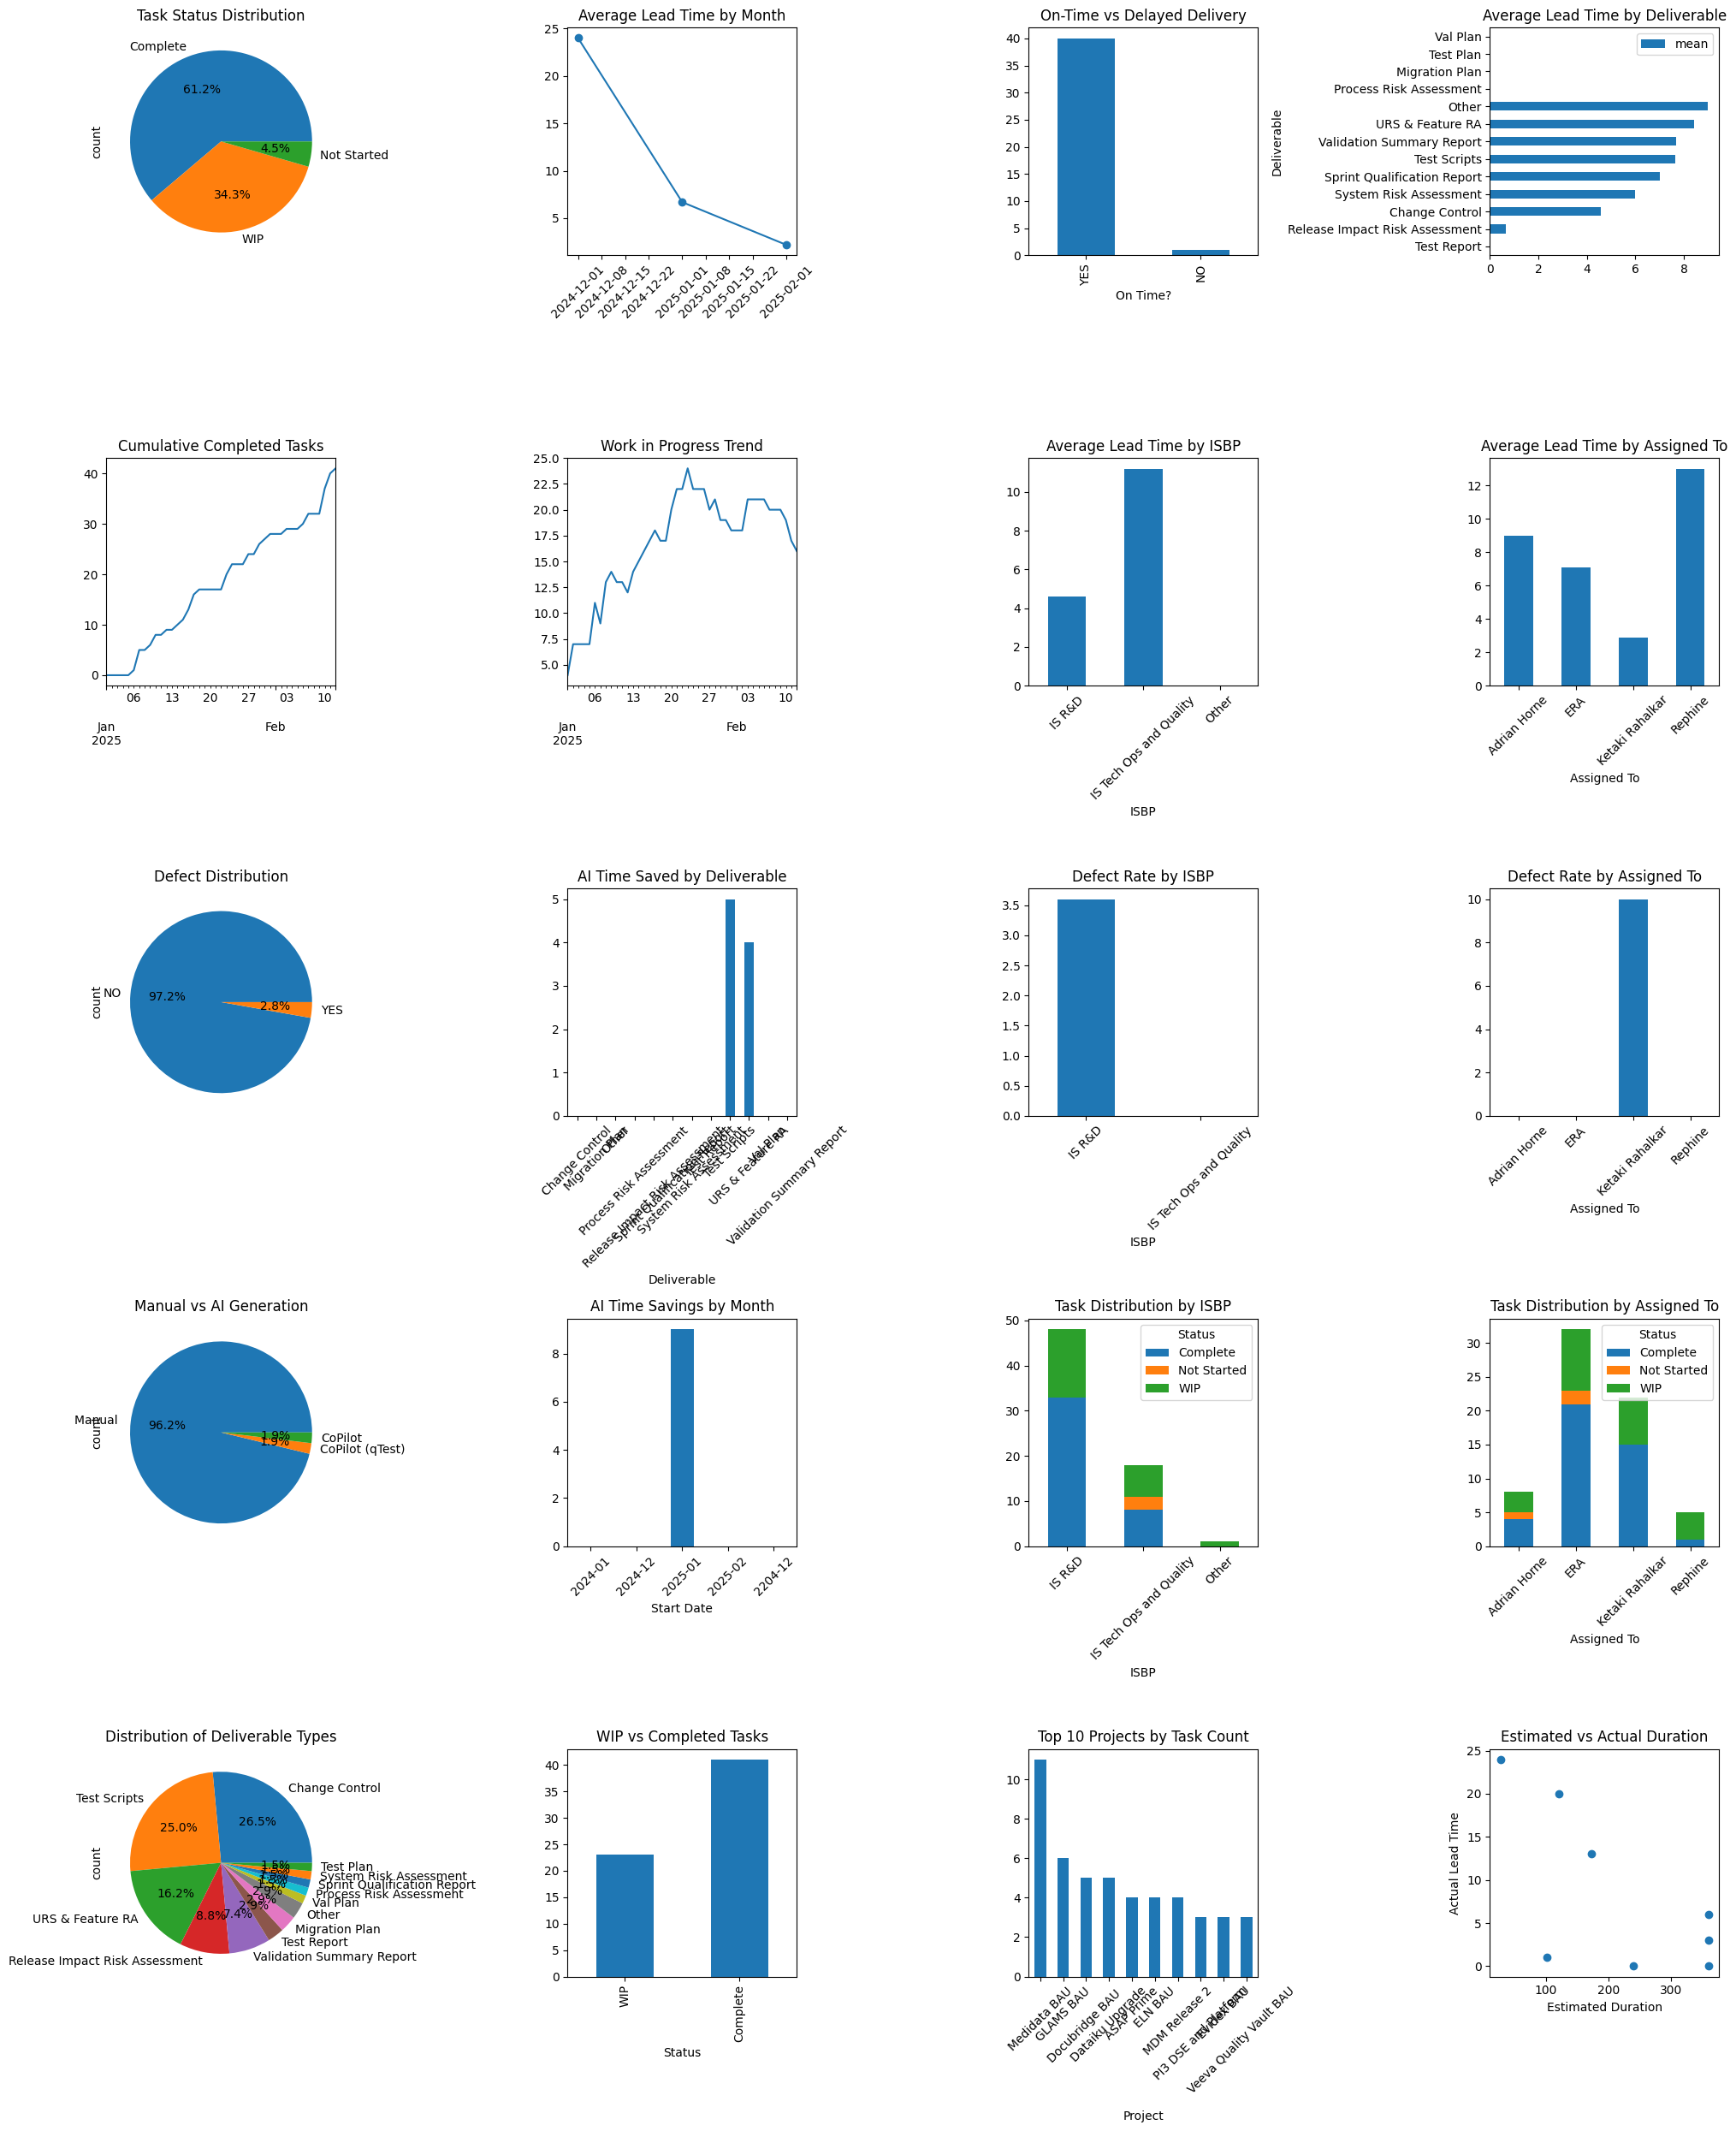

In [28]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create figure with subplots in a 5x4 grid
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.ravel() # Flatten axes array

# 1. Task Status Distribution
status_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Task Status Distribution')

# 2. Average Lead Time by Month 
axes[1].plot(monthly_leadtime.index, monthly_leadtime.values, marker='o')
axes[1].set_title('Average Lead Time by Month')
axes[1].tick_params(axis='x', rotation=45)

# 3. On-Time vs Delayed Delivery
on_time_counts.plot(kind='bar', ax=axes[2])
axes[2].set_title('On-Time vs Delayed Delivery')

# 4. Average Lead Time by Deliverable
deliverable_stats.sort_values('mean', ascending=True).plot(kind='barh', x='Deliverable', y='mean', ax=axes[3])
axes[3].set_title('Average Lead Time by Deliverable')

# 5. Cumulative Completed Tasks
cumulative_data['Complete'].plot(ax=axes[4])
axes[4].set_title('Cumulative Completed Tasks')

# 6. Work in Progress Trend
cumulative_data['WIP'].plot(ax=axes[5])
axes[5].set_title('Work in Progress Trend')

# 7. Average Lead Time by ISBP
isbp_lead['mean'].plot(kind='bar', ax=axes[6])
axes[6].set_title('Average Lead Time by ISBP')
axes[6].tick_params(axis='x', rotation=45)

# 8. Average Lead Time by Assigned To
assigned_lead['mean'].plot(kind='bar', ax=axes[7])
axes[7].set_title('Average Lead Time by Assigned To')
axes[7].tick_params(axis='x', rotation=45)

# 9. Defect Distribution
defect_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[8])
axes[8].set_title('Defect Distribution')

# 10. AI Time Saved by Deliverable
ai_time_saved_by_deliverable.plot(kind='bar', ax=axes[9])
axes[9].set_title('AI Time Saved by Deliverable')
axes[9].tick_params(axis='x', rotation=45)

# 11. Defect Rate by ISBP
isbp_defect_rate.plot(kind='bar', ax=axes[10])
axes[10].set_title('Defect Rate by ISBP')
axes[10].tick_params(axis='x', rotation=45)

# 12. Defect Rate by Assigned To
assigned_defect_rate.plot(kind='bar', ax=axes[11])
axes[11].set_title('Defect Rate by Assigned To')
axes[11].tick_params(axis='x', rotation=45)

# 13. Manual vs AI Generation
df['AI or Manual Generation'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[12])
axes[12].set_title('Manual vs AI Generation')

# 14. AI Time Savings by Month
df.groupby(df['Start Date'].dt.to_period('M'))['AI Time Saved (hours)'].sum().plot(kind='bar', ax=axes[13])
axes[13].set_title('AI Time Savings by Month')
axes[13].tick_params(axis='x', rotation=45)

# 15. Task Distribution by ISBP
isbp_status.plot(kind='bar', stacked=True, ax=axes[14])
axes[14].set_title('Task Distribution by ISBP')
axes[14].tick_params(axis='x', rotation=45)

# 16. Task Distribution by Assigned To
assigned_status.plot(kind='bar', stacked=True, ax=axes[15])
axes[15].set_title('Task Distribution by Assigned To')
axes[15].tick_params(axis='x', rotation=45)

# 17. Distribution of Deliverable Types
df['Deliverable'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[16])
axes[16].set_title('Distribution of Deliverable Types')

# 18. WIP vs Completed Tasks
status_counts[['WIP', 'Complete']].plot(kind='bar', ax=axes[17])
axes[17].set_title('WIP vs Completed Tasks')

# 19. Top 10 Projects by Task Count
df['Project'].value_counts().head(10).plot(kind='bar', ax=axes[18])
axes[18].set_title('Top 10 Projects by Task Count')
axes[18].tick_params(axis='x', rotation=45)

# 20. Estimated vs Actual Duration
axes[19].scatter(df['Estimated Duration (in days)'], df['Lead Time'])
axes[19].set_title('Estimated vs Actual Duration')
axes[19].set_xlabel('Estimated Duration')
axes[19].set_ylabel('Actual Lead Time')

plt.tight_layout()
plt.show()

In [ ]:
df